About Dataset
## Dataset Overview

This dataset is undertaken to create a predictive model for the transfer values of football players. We will utilize data from football players and construct a model to predict transfer fees based on that data. Player data includes basic information such as age, height, playing position, as well as professional statistics like goal scoring, assists (in the 2021-2022 and 2022-2023 seasons), injuries, along with total individual and team awards in their career.

### Leagues Covered

We have gathered information on players competing in several top-tier global football leagues:

- **11 European leagues**, including:
    - Premier League and Championship in England
    - Bundesliga in Germany
    - La Liga in Spain
    - Serie A in Italy
    - Ligue 1 in France
    - Eredivisie in the Netherlands
    - Liga NOS in Portugal
    - Premier Liga in Russia
    - Super Lig in Turkey
    - Bundesliga in Austria

- **4 American leagues**, including:
    - Brasileiro in Brazil
    - Major League Soccer in the United States
    - Primera División in Argentina
    - Liga MX in Mexico

- **1 African league**, namely:
    - DStv Premiership in South Africa

- **4 Asian leagues**, comprising:
    - J-League in Japan
    - Saudi Pro League in Saudi Arabia
    - K-League 1 in South Korea
    - A-League in Australia

### Dataset author overview

This dataset was generated by scraping data from Transfermarkt using Selenium and BeautifulSoup on June 10, 2023. To enhance the evaluation of the prediction model, the statistics, namely "goals," "assists," "yellow cards," "second yellow cards," "red cards," "goals conceded," and "clean sheets," were transformed to a per 90 minutes basis. This transformation involved dividing each statistical value by the corresponding per 90 value (calculated as minutes played divided by 90).

Following Exploratory Data Analysis (EDA), we pinpointed a selection of variables demonstrating a strong correlation with the target variable 'current_value.' These variables comprise 'highest_value', 'appearance', 'minutes played', 'award', 'assists', 'goals' and 'position_encoded'. Leveraging these variables can markedly improve model efficiency, contrasting with the indiscriminate inclusion of all variables.

## Dims

- Is data Reliable? Yes
- Is it up to date? No
- Is it relevance? Yes

## Import libraries

In [96]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error

## Data

In [97]:
# Read the data
df = pd.read_csv('final_data.csv')

In [98]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [100]:
# Drop the column that is not needed
df = df.drop(['player'], axis=1)

df.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [101]:
df.describe() # Check the summary statistics

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


Potential problems:
- Outliers
- Need to scaling

In [102]:
df.isnull().sum() # Check for missing values

team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [103]:
# walk through the data and check the unique values in each column
for column in df.columns:
    print(column)
    print(df[column].unique())

team
['Manchester United' 'West Ham United' 'Leicester City' 'Aston Villa'
 'Wolverhampton Wanderers' 'Southampton FC' 'Brighton &amp; Hove Albion'
 'Everton FC' 'Nottingham Forest' 'Leeds United' 'Crystal Palace'
 'Fulham FC' 'AFC Bournemouth' 'Brentford FC' 'Liverpool FC'
 'Newcastle United' 'Manchester City' 'Arsenal FC' 'Tottenham Hotspur'
 'Chelsea FC' 'Borussia Mönchengladbach' 'VfL Wolfsburg'
 'TSG 1899 Hoffenheim' '1.FC Union Berlin' 'FC Augsburg' 'VfB Stuttgart'
 '1.FSV Mainz 05' '1.FC Köln' 'Hertha BSC' 'FC Schalke 04' 'VfL Bochum'
 'SV Werder Bremen' 'Eintracht Frankfurt' 'SC Freiburg'
 'Borussia Dortmund' 'Bayer 04 Leverkusen' 'Bayern Munich' 'RB Leipzig'
 'Real Sociedad' 'Villarreal CF' 'Real Betis Balompié' 'Athletic Bilbao'
 'Valencia CF' 'Sevilla FC' 'Celta de Vigo' 'CA Osasuna' 'Girona FC'
 'Rayo Vallecano' 'RCD Mallorca' 'UD Almería' 'Real Valladolid CF'
 'Cádiz CF' 'Elche CF' 'RCD Espanyol Barcelona' 'Getafe CF'
 'Atlético de Madrid' 'Real Madrid' 'FC Barcelona' 'AS 

In [104]:
df['position'].value_counts() # Check the distribution of the position column

position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64

In [105]:
df['position_encoded'].value_counts() # Check the distribution of the position_encoded column

position_encoded
2    3528
3    3095
4    2902
1    1229
Name: count, dtype: int64

In [106]:
for i in df['position_encoded'].unique():
    print(f"Position encoded {i}: {df[df['position_encoded'] == i]['position'].unique()}")

# 1 for GK, 2 for DEF, 3 for MID, 4 for ATT

Position encoded 1: ['Goalkeeper']
Position encoded 2: ['Defender Centre-Back' 'Defender Left-Back' 'Defender Right-Back'
 'Defender']
Position encoded 3: ['midfield-DefensiveMidfield' 'midfield-CentralMidfield'
 'midfield-AttackingMidfield' 'midfield-RightMidfield'
 'midfield-LeftMidfield' 'midfield']
Position encoded 4: ['Attack-LeftWinger' 'Attack-RightWinger' 'Attack Centre-Forward'
 'Attack-SecondStriker' 'Attack']


For now, we will keep the position, but we will use the position encoded with winger in the modeling

Now we will check the outliers

In [107]:
# Get numerical columns
num_cols = df.select_dtypes(include=['number']).columns 

# Function to plot and identify outliers
def plot_and_identify_outliers(df, num_cols):
    sum_outliers = 0
    for column in num_cols:
        plt.figure(figsize=(7, 2))
        
        # Plot histogram
        plt.subplot(1, 2, 1)
        df[column].hist()
        plt.title(f'{column} distribution')
        
        # Plot boxplot
        plt.subplot(1, 2, 2)
        df.boxplot(column=[column])
        plt.title(f'{column} boxplot')
        
        # Show plots
        plt.show()
        
        # Calculate IQR (Interquartile Range)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Identify outliers
        outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
        
        # Add the number of outliers to the sum
        sum_outliers += outliers.shape[0]
        
        # Print the number of outliers for the current column
        print(f'The number of outliers in {column} is {outliers.shape[0]}')
        print(df[column].describe())
    
    # Print the total number of outliers
    print(f'The total number of outliers is {sum_outliers}')


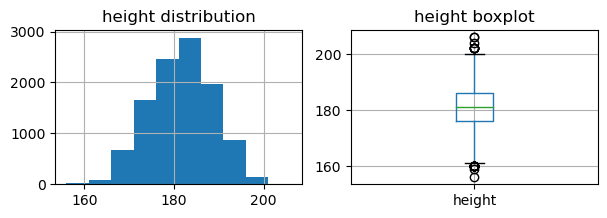

The number of outliers in height is 26
count    10754.000000
mean       181.240353
std          6.969818
min        156.000000
25%        176.000000
50%        181.240353
75%        186.000000
max        206.000000
Name: height, dtype: float64


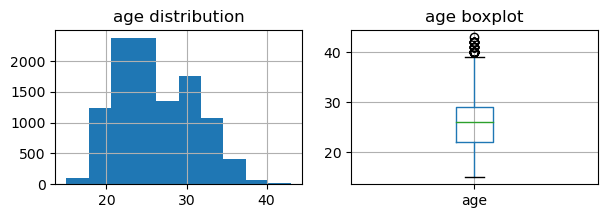

The number of outliers in age is 33
count    10754.000000
mean        26.041903
std          4.777629
min         15.000000
25%         22.000000
50%         26.000000
75%         29.000000
max         43.000000
Name: age, dtype: float64


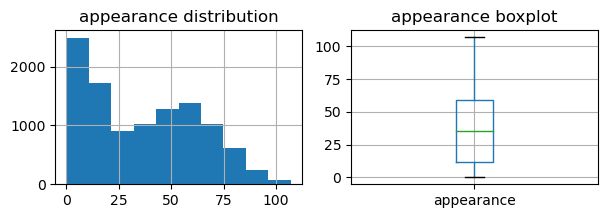

The number of outliers in appearance is 0
count    10754.000000
mean        36.407011
std         26.526541
min          0.000000
25%         12.000000
50%         35.000000
75%         59.000000
max        107.000000
Name: appearance, dtype: float64


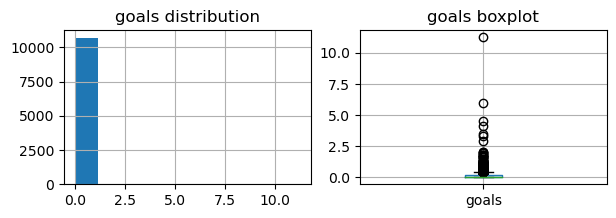

The number of outliers in goals is 772
count    10754.000000
mean         0.125554
std          0.235585
min          0.000000
25%          0.000000
50%          0.045969
75%          0.172263
max         11.250000
Name: goals, dtype: float64


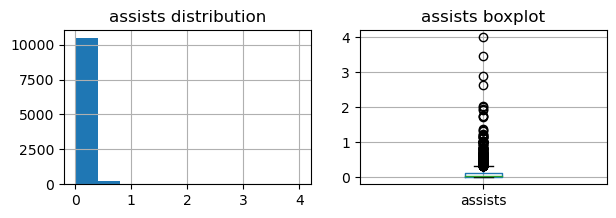

The number of outliers in assists is 413
count    10754.000000
mean         0.086978
std          0.143351
min          0.000000
25%          0.000000
50%          0.040773
75%          0.133136
max          4.000000
Name: assists, dtype: float64


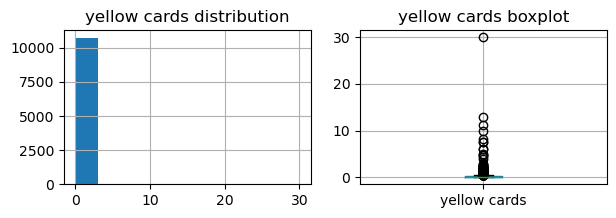

The number of outliers in yellow cards is 363
count    10754.000000
mean         0.189757
std          0.432388
min          0.000000
25%          0.053191
50%          0.150250
75%          0.248276
max         30.000000
Name: yellow cards, dtype: float64


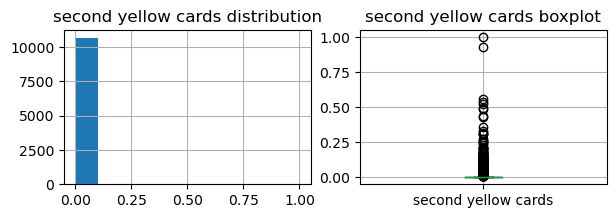

The number of outliers in second yellow cards is 1169
count    10754.000000
mean         0.004666
std          0.025232
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: second yellow cards, dtype: float64


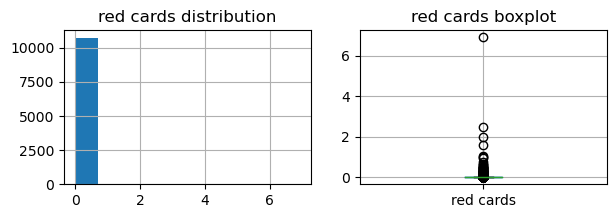

The number of outliers in red cards is 1331
count    10754.000000
mean         0.006826
std          0.081143
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.923077
Name: red cards, dtype: float64


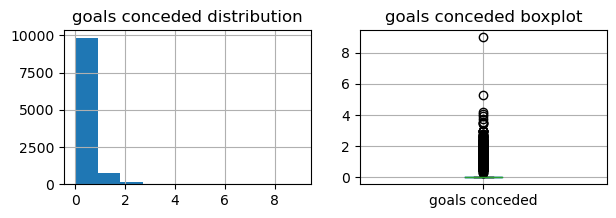

The number of outliers in goals conceded is 1015
count    10754.000000
mean         0.131655
std          0.442335
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: goals conceded, dtype: float64


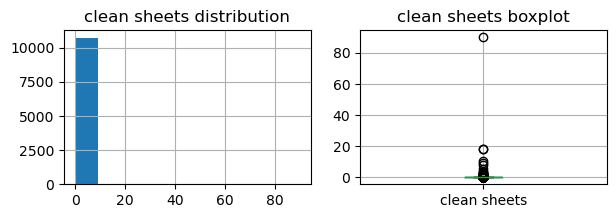

The number of outliers in clean sheets is 954
count    10754.000000
mean         0.044881
std          0.924437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         90.000000
Name: clean sheets, dtype: float64


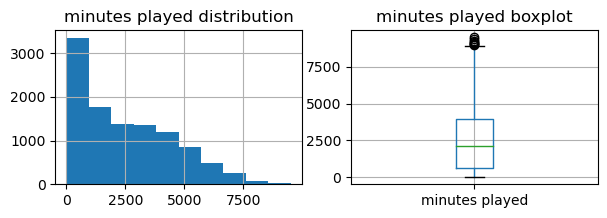

The number of outliers in minutes played is 8
count    10754.000000
mean      2470.789381
std       2021.703271
min          0.000000
25%        660.000000
50%       2101.500000
75%       3968.000000
max       9510.000000
Name: minutes played, dtype: float64


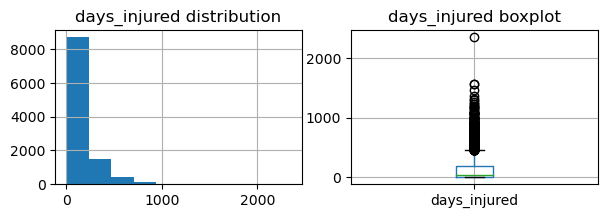

The number of outliers in days_injured is 608
count    10754.000000
mean       117.961689
std        175.206827
min          0.000000
25%          0.000000
50%         37.000000
75%        181.000000
max       2349.000000
Name: days_injured, dtype: float64


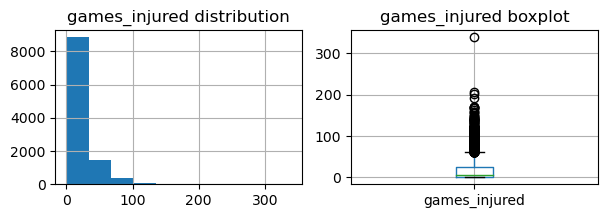

The number of outliers in games_injured is 612
count    10754.000000
mean        15.826297
std         23.383606
min          0.000000
25%          0.000000
50%          5.000000
75%         24.000000
max        339.000000
Name: games_injured, dtype: float64


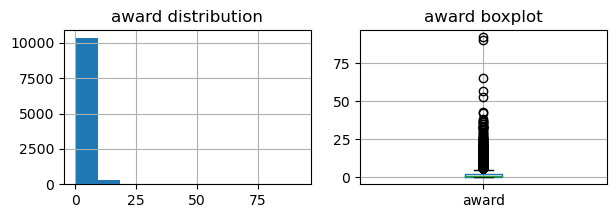

The number of outliers in award is 1034
count    10754.000000
mean         1.960759
std          3.743936
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         92.000000
Name: award, dtype: float64


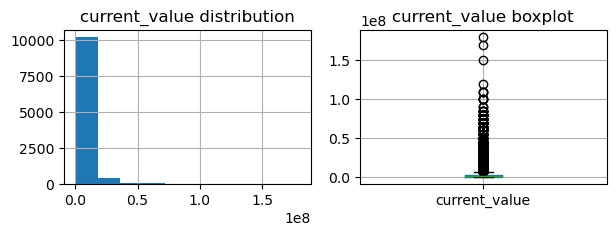

The number of outliers in current_value is 1260
count    1.075400e+04
mean     3.622971e+06
std      9.095410e+06
min      0.000000e+00
25%      3.000000e+05
50%      8.000000e+05
75%      3.000000e+06
max      1.800000e+08
Name: current_value, dtype: float64


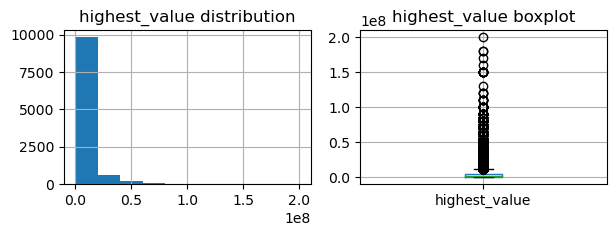

The number of outliers in highest_value is 1535
count    1.075400e+04
mean     6.152606e+06
std      1.338988e+07
min      0.000000e+00
25%      4.500000e+05
50%      1.500000e+06
75%      5.000000e+06
max      2.000000e+08
Name: highest_value, dtype: float64


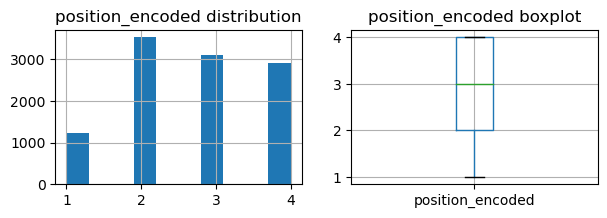

The number of outliers in position_encoded is 0
count    10754.000000
mean         2.713223
std          0.986356
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: position_encoded, dtype: float64


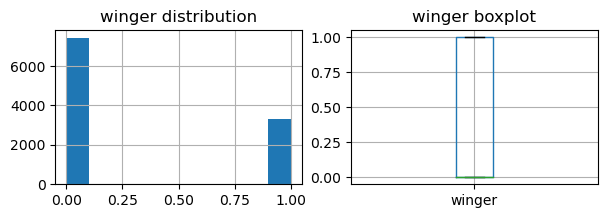

The number of outliers in winger is 0
count    10754.000000
mean         0.307513
std          0.461485
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: winger, dtype: float64
The total number of outliers is 11133


In [108]:
# Call the function
plot_and_identify_outliers(df, num_cols)

#### There are outliers :(

In [109]:
col = ['minutes played', 'age', 'height']

for column in col:
    # Calculate IQR (Interquartile Range)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Remove outliers
    df = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]

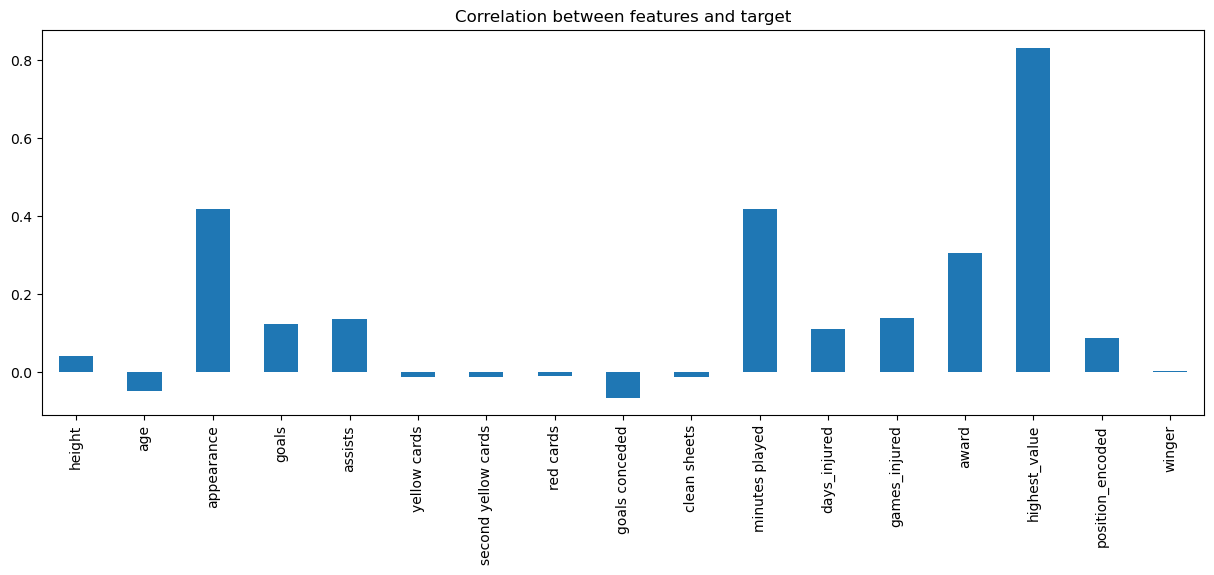

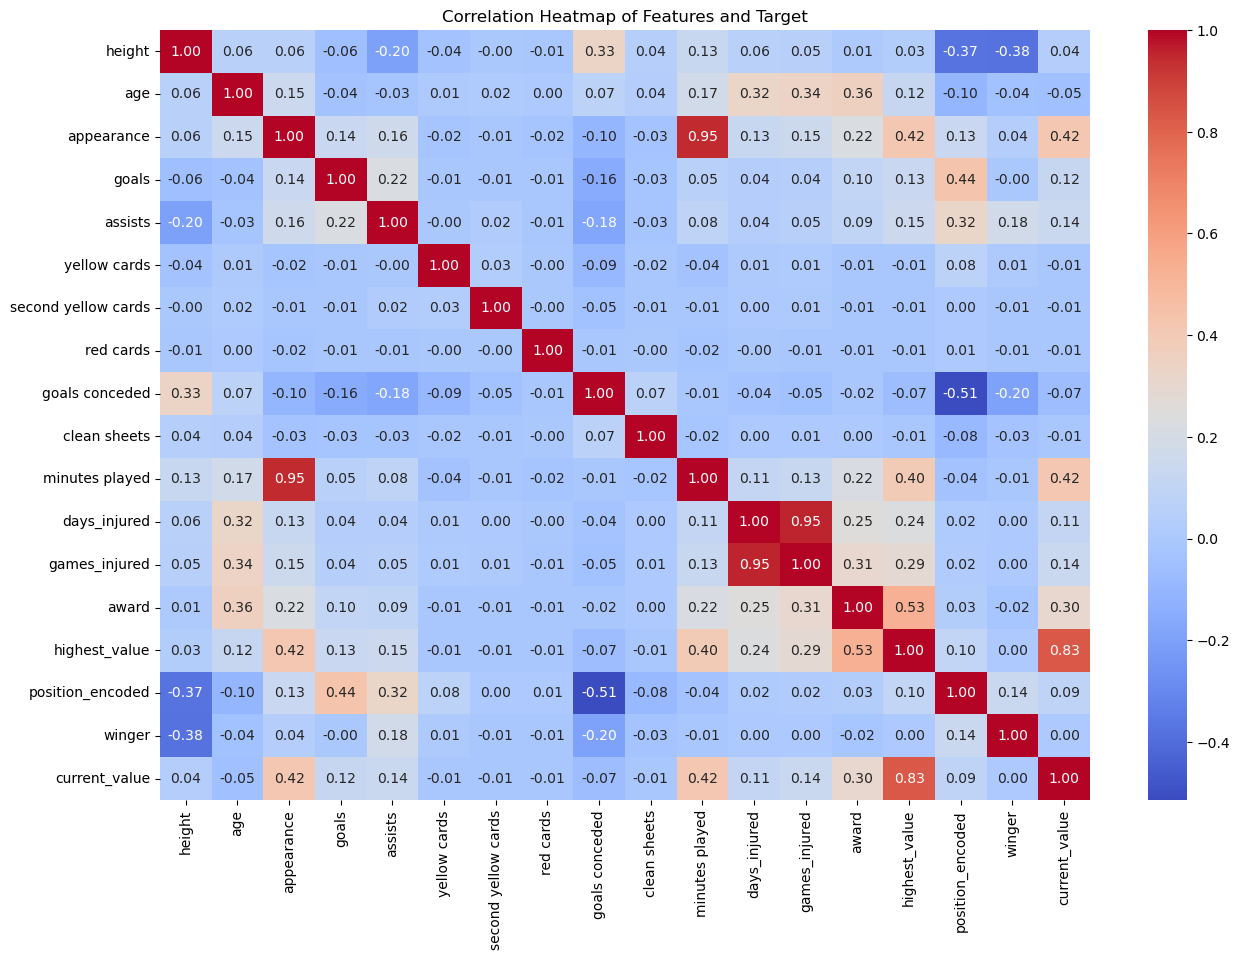

In [110]:
# Define X and y
X = df.drop(['current_value', 'team', 'name'], axis=1)
y = df['current_value']

# Get numerical columns
num_cols_x = X.select_dtypes(include=['number']).columns

# Check the correlation between the features and the target
correlation = X[num_cols_x].corrwith(y)
correlation.sort_values(ascending=False)

# Plot the correlation
correlation.plot(kind='bar', figsize=(15, 5))
plt.title('Correlation between features and target')
plt.show()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(X[num_cols_x].join(y).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features and Target')
plt.show()

From here i could say that something like "clean sheets" is specific to goalkeepers and set to zero for all other positions, it would likely introduce noise in predicting for our target
- So, I will build 4 models for each position.

### Data & Modeling

In [111]:
# Split the dataframe into 4 dataframes based on the position_encoded
df_gk = df[df['position_encoded'] == 1]
df_def = df[df['position_encoded'] == 2]
df_mid = df[df['position_encoded'] == 3]
df_att = df[df['position_encoded'] == 4]

Working on GK dataframe

In [112]:
df_gk.drop(['position', 'position_encoded','winger'], axis=1, inplace=True)

C:\Users\farsa\AppData\Local\Temp\ipykernel_4244\3197165293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gk.drop(['position', 'position_encoded','winger'], axis=1, inplace=True)


In [113]:
df_gk.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.0,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1.199000e+03,1.199000e+03
mean,188.774827,27.226092,23.929942,0.000421,0.0,0.051247,0.000971,0.005083,1.156886,0.392480,2136.141785,87.845705,11.092577,1.768140,1.570942e+06,3.022039e+06
std,4.661122,5.398289,24.205922,0.005372,0.0,0.094760,0.012080,0.045250,0.734912,2.742276,2178.281394,151.123181,18.796217,3.125845,4.524554e+06,7.543085e+06
min,172.000000,15.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,186.000000,23.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.844497,0.110613,270.000000,0.000000,0.000000,0.000000,1.000000e+05,2.000000e+05
50%,189.000000,27.000000,16.000000,0.000000,0.0,0.017517,0.000000,0.000000,1.216216,0.253944,1461.000000,11.000000,1.000000,1.000000,3.000000e+05,6.000000e+05
75%,192.000000,31.000000,39.000000,0.000000,0.0,0.075133,0.000000,0.000000,1.536578,0.361951,3502.000000,122.000000,14.000000,2.000000,1.000000e+06,2.000000e+06
max,200.000000,39.000000,99.000000,0.103448,0.0,1.000000,0.255682,1.000000,9.000000,90.000000,8928.000000,1169.000000,139.000000,36.000000,5.000000e+07,1.000000e+08


In [114]:
df_gk.drop(['assists', 'goals', 'yellow cards', 'second yellow cards', 'red cards'], axis=1, inplace=True)

C:\Users\farsa\AppData\Local\Temp\ipykernel_4244\3777406471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gk.drop(['assists', 'goals', 'yellow cards', 'second yellow cards', 'red cards'], axis=1, inplace=True)


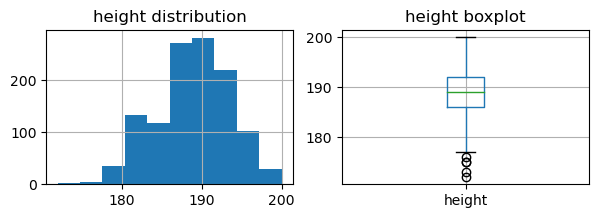

The number of outliers in height is 5
count    1199.000000
mean      188.774827
std         4.661122
min       172.000000
25%       186.000000
50%       189.000000
75%       192.000000
max       200.000000
Name: height, dtype: float64


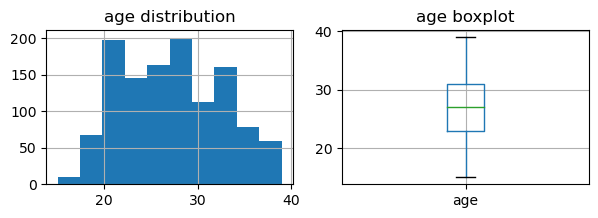

The number of outliers in age is 0
count    1199.000000
mean       27.226092
std         5.398289
min        15.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        39.000000
Name: age, dtype: float64


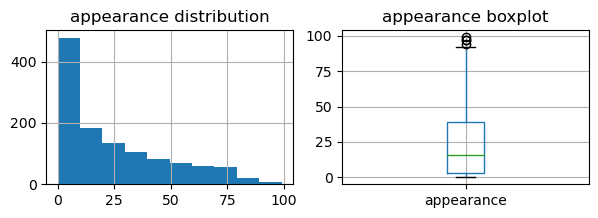

The number of outliers in appearance is 4
count    1199.000000
mean       23.929942
std        24.205922
min         0.000000
25%         3.000000
50%        16.000000
75%        39.000000
max        99.000000
Name: appearance, dtype: float64


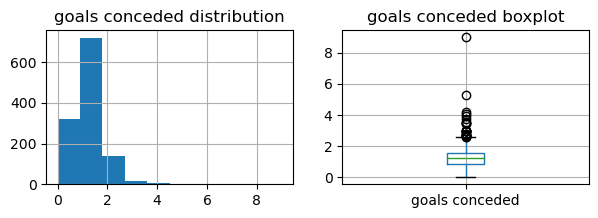

The number of outliers in goals conceded is 27
count    1199.000000
mean        1.156886
std         0.734912
min         0.000000
25%         0.844497
50%         1.216216
75%         1.536578
max         9.000000
Name: goals conceded, dtype: float64


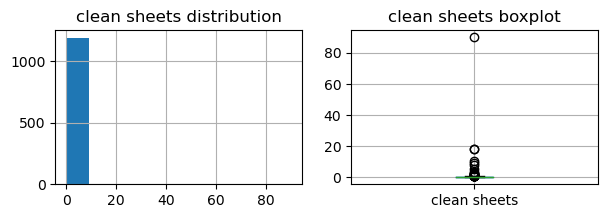

The number of outliers in clean sheets is 40
count    1199.000000
mean        0.392480
std         2.742276
min         0.000000
25%         0.110613
50%         0.253944
75%         0.361951
max        90.000000
Name: clean sheets, dtype: float64


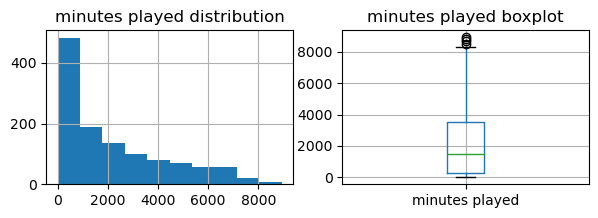

The number of outliers in minutes played is 4
count    1199.000000
mean     2136.141785
std      2178.281394
min         0.000000
25%       270.000000
50%      1461.000000
75%      3502.000000
max      8928.000000
Name: minutes played, dtype: float64


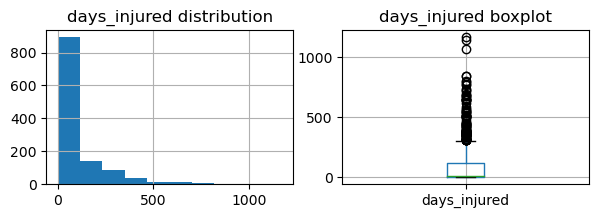

The number of outliers in days_injured is 98
count    1199.000000
mean       87.845705
std       151.123181
min         0.000000
25%         0.000000
50%        11.000000
75%       122.000000
max      1169.000000
Name: days_injured, dtype: float64


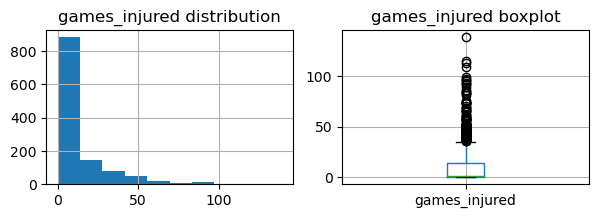

The number of outliers in games_injured is 126
count    1199.000000
mean       11.092577
std        18.796217
min         0.000000
25%         0.000000
50%         1.000000
75%        14.000000
max       139.000000
Name: games_injured, dtype: float64


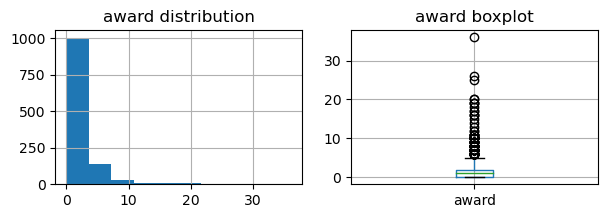

The number of outliers in award is 108
count    1199.000000
mean        1.768140
std         3.125845
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        36.000000
Name: award, dtype: float64


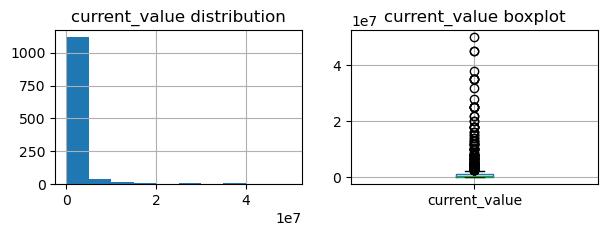

The number of outliers in current_value is 154
count    1.199000e+03
mean     1.570942e+06
std      4.524554e+06
min      0.000000e+00
25%      1.000000e+05
50%      3.000000e+05
75%      1.000000e+06
max      5.000000e+07
Name: current_value, dtype: float64


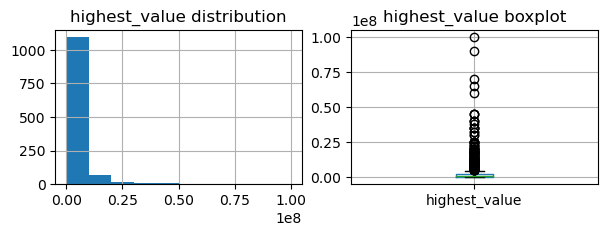

The number of outliers in highest_value is 186
count    1.199000e+03
mean     3.022039e+06
std      7.543085e+06
min      0.000000e+00
25%      2.000000e+05
50%      6.000000e+05
75%      2.000000e+06
max      1.000000e+08
Name: highest_value, dtype: float64
The total number of outliers is 752


In [115]:
num_cols_gk = df_gk.select_dtypes(include=['number']).columns
plot_and_identify_outliers(df_gk, num_cols_gk)

Dealing with outliers

In [116]:
# Filter the df_gk dataframe to remove outliers based on multiple conditions
df_gk = df_gk[
    (df_gk['award'] <= 6) &  # Keep rows where 'award' is less than or equal to 6
    (df_gk['games_injured'] <= 40) &  # Keep rows where 'games_injured' is less than or equal to 40
    (df_gk['days_injured'] <= 370) &  # Keep rows where 'days_injured' is less than or equal to 370
    (df_gk['clean sheets'] <= 4) &  # Keep rows where 'clean sheets' is less than or equal to 4
    (df_gk['goals conceded'] <= 3) &  # Keep rows where 'goals conceded' is less than or equal to 3
    (df_gk['highest_value'] <= 0.2e8) # Keep all the values less than 0.2 le8
]

In [117]:
df_gk.describe()

,height,age,appearance,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
count,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.00000,1002.000000,1.002000e+03,1.002000e+03
mean,188.630037,26.560962,21.783433,1.120327,0.255495,1943.972056,48.894212,6.01497,1.036926,9.748353e+05,1.689122e+06
std,4.684536,5.194970,22.580835,0.683349,0.262464,2030.322061,79.767537,9.72092,1.487757,2.195688e+06,3.233374e+06
min,172.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00
25%,185.000000,22.000000,3.000000,0.800000,0.076923,208.500000,0.000000,0.00000,0.000000,1.000000e+05,1.500000e+05
50%,189.000000,26.000000,14.000000,1.216706,0.250000,1260.000000,0.000000,0.00000,0.000000,3.000000e+05,4.625000e+05
75%,192.000000,30.000000,35.000000,1.535292,0.350658,3142.500000,72.000000,9.00000,2.000000,7.000000e+05,1.500000e+06
max,200.000000,39.000000,97.000000,3.000000,3.214286,8820.000000,367.000000,40.00000,6.000000,2.000000e+07,2.000000e+07


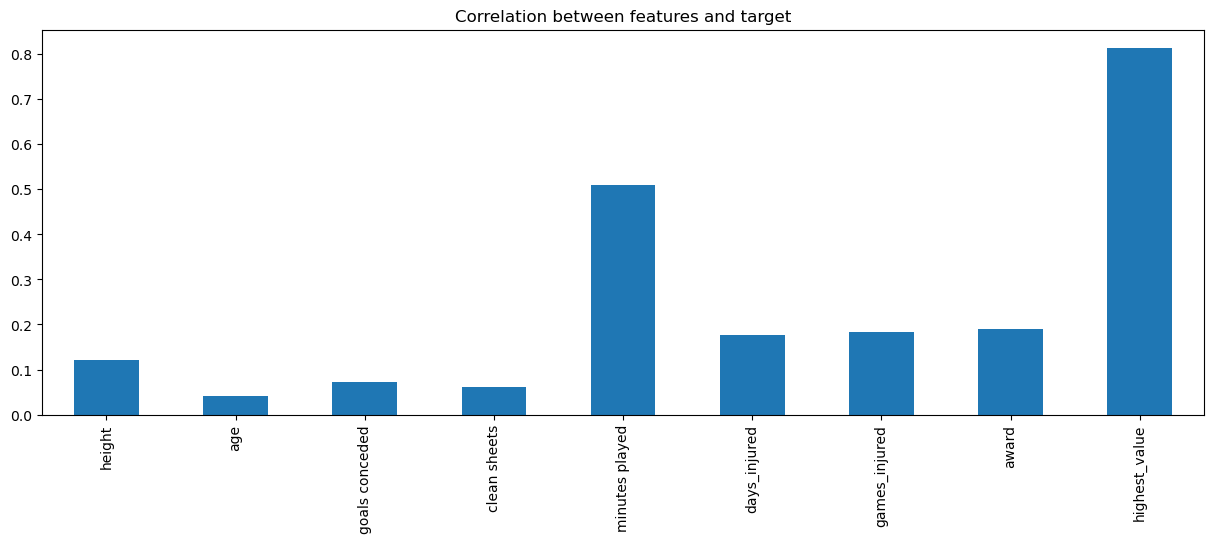

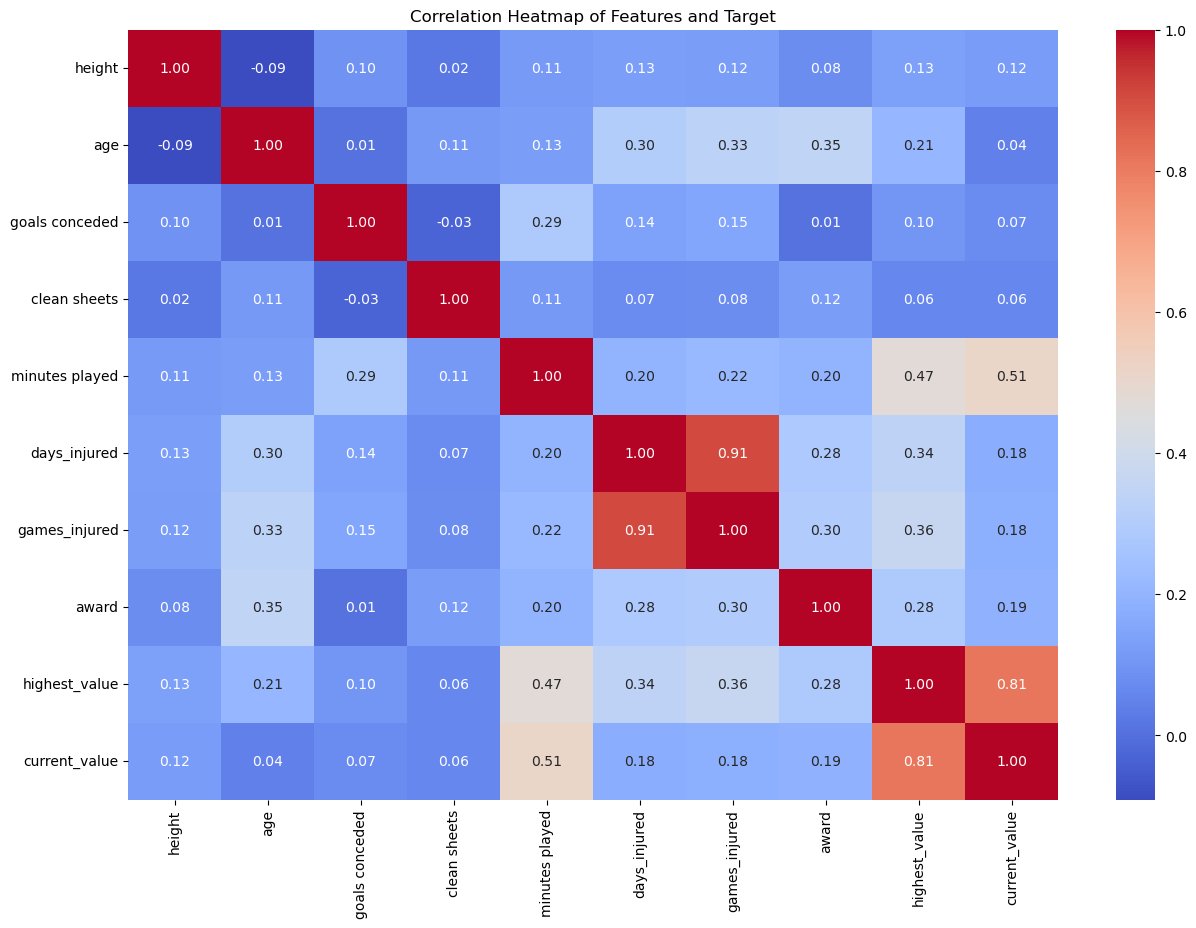

In [118]:
X_gk = df_gk.drop(['current_value','team','name', 'appearance'], axis=1) # Define X
y_gk = df_gk['current_value'] # Define y

num_cols_gk = X_gk.select_dtypes(include=['number']).columns # Get numerical columns

# Rescale the numerical columns
scaler = MinMaxScaler()
X_gk[num_cols_gk] = scaler.fit_transform(X_gk[num_cols_gk])

# Show the correlation between the features and the target
correlation_gk = X_gk[num_cols_gk].corrwith(y_gk)
correlation_gk.sort_values(ascending=False)

# Plot the correlation
correlation_gk.plot(kind='bar', figsize=(15, 5))
plt.title('Correlation between features and target')
plt.show()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(X_gk[num_cols_gk].join(y_gk).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features and Target')
plt.show()

In [119]:
# Split the data into training and testing sets for regression
X_train, X_test, y_train, y_test = train_test_split(X_gk, y_gk, test_size=0.2, random_state=16)

# Define the target for classification based on current_value
Q1 = df_def['current_value'].quantile(0.25)
Q3 = df_def['current_value'].quantile(0.75)

def classify_value(value):
    if value <= Q1:
        return 'Low'
    elif value <= Q3:
        return 'Mid'
    else:
        return 'High'

df_gk['target'] = df_gk['current_value'].apply(classify_value)

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_gk, df_gk['target'], test_size=0.2, random_state=16)

In [120]:
# Create the model
reg_model = LinearRegression()
class_model = LogisticRegression()

# Fit the model
reg_model.fit(X_train, y_train)

# Predict the target
y_pred = reg_model.predict(X_test)

# accuracy of the model
accuracy = reg_model.score(X_test, y_test)
print(f'The accuracy of the model is {accuracy}')
# Fit the classification model
class_model.fit(X_train_class, y_train_class)

# Predict the target for classification
y_pred_class = class_model.predict(X_test_class)

# accuracy of the classification model
accuracy_class = class_model.score(X_test_class, y_test_class)
print(f'The accuracy of the classification model is {accuracy_class}')

The accuracy of the model is 0.7611548042252607
The accuracy of the classification model is 0.7263681592039801


In [121]:
# MSE
mse = mean_squared_error(y_test, y_pred)
print(f'The mean squared error of the model is {mse}')

The mean squared error of the model is 1238970863392.7043


In [122]:
# Check the coefficients
coefficients = pd.DataFrame(reg_model.coef_, index=X_train.columns, columns=['Coefficient'])
coefficients

,Coefficient
height,2.265536e+05
age,-9.904592e+05
goals conceded,-4.678584e+05
clean sheets,2.439511e+05
minutes played,1.920208e+06
days_injured,2.708473e+05
games_injured,-1.124670e+06
award,-4.964619e+04
highest_value,1.008275e+07


In [123]:
# Check the intercept
intercept = reg_model.intercept_
intercept

317631.6382455955

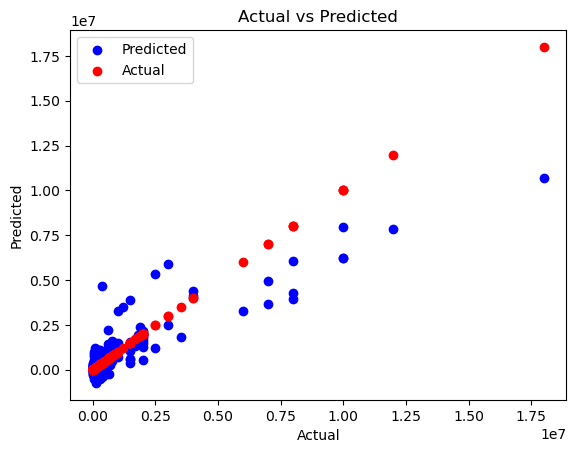

In [124]:
# show the actual and predicted values
df_1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# plot the actual and predicted values in scatter plot
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual')
plt.legend()
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## Def dataframe

In [125]:
df_def # Check the dataframe

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.000000,...,0.0,0.0,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.000000,...,0.0,0.0,5031,238,51,21,40000000,80000000,2,0
5,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,0.018900,...,0.0,0.0,4762,148,27,1,25000000,70000000,2,0
6,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,0.000000,...,0.0,0.0,5471,95,19,10,15000000,35000000,2,0
7,Manchester United,Phil Jones,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,0.000000,...,0.0,0.0,416,932,169,7,2000000,20000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10731,Western Sydney Wanderers,Rhys Williams,Defender Centre-Back,187.0,34.0,6,0.000000,0.000000,0.681818,0.000000,...,0.0,0.0,528,1307,146,0,150000,2000000,2,0
10732,Western Sydney Wanderers,Adama Traoré,Defender Left-Back,170.0,33.0,50,0.000000,0.000000,0.170374,0.021297,...,0.0,0.0,4226,412,63,4,250000,1500000,2,1
10733,Western Sydney Wanderers,Daniel Wilmering,Defender Left-Back,178.0,22.0,22,0.000000,0.131291,0.000000,0.000000,...,0.0,0.0,1371,0,0,0,200000,350000,2,1
10734,Western Sydney Wanderers,Gabriel Cléùr,Defender Right-Back,181.0,25.0,42,0.027149,0.162896,0.380090,0.027149,...,0.0,0.0,3315,66,11,1,400000,400000,2,1


In [126]:
df_def.drop(['position', 'position_encoded', 'goals conceded', 'clean sheets'], axis=1, inplace=True) # Drop the columns that are not needed

C:\Users\farsa\AppData\Local\Temp\ipykernel_4244\55318129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def.drop(['position', 'position_encoded', 'goals conceded', 'clean sheets'], axis=1, inplace=True) # Drop the columns that are not needed


In [127]:
df_def.describe() # Check the summary statistics

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
count,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3.521000e+03,3.521000e+03,3521.000000
mean,182.473865,26.290270,36.739847,0.043802,0.055507,0.199142,0.006137,0.006591,2745.850611,130.406987,17.516899,1.867651,3.302563e+06,5.391808e+06,0.475149
std,6.368859,4.572874,25.204503,0.079028,0.108441,0.293112,0.025566,0.025035,2059.339313,184.883194,24.714215,3.275873,7.603727e+06,1.057046e+07,0.499453
min,162.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,178.000000,23.000000,13.000000,0.000000,0.000000,0.097968,0.000000,0.000000,886.000000,0.000000,0.000000,0.000000,3.000000e+05,5.000000e+05,0.000000
50%,183.000000,26.000000,37.000000,0.022444,0.023523,0.175173,0.000000,0.000000,2515.000000,52.000000,7.000000,1.000000,8.000000e+05,1.500000e+06,0.000000
75%,187.000000,30.000000,57.000000,0.064103,0.077620,0.257143,0.000000,0.000000,4336.000000,201.000000,26.000000,2.000000,2.800000e+06,5.000000e+06,1.000000
max,200.000000,39.000000,107.000000,1.956522,3.461538,11.250000,0.559006,0.629371,8860.000000,1570.000000,206.000000,43.000000,7.500000e+07,1.100000e+08,1.000000


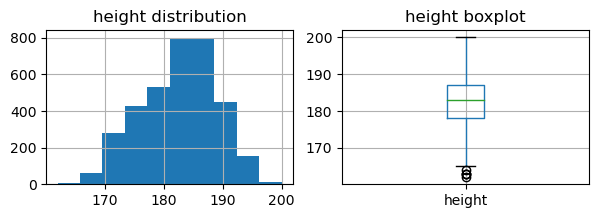

The number of outliers in height is 5
count    3521.000000
mean      182.473865
std         6.368859
min       162.000000
25%       178.000000
50%       183.000000
75%       187.000000
max       200.000000
Name: height, dtype: float64


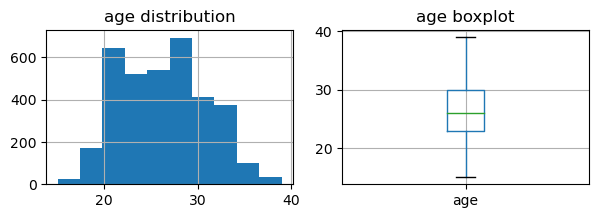

The number of outliers in age is 0
count    3521.000000
mean       26.290270
std         4.572874
min        15.000000
25%        23.000000
50%        26.000000
75%        30.000000
max        39.000000
Name: age, dtype: float64


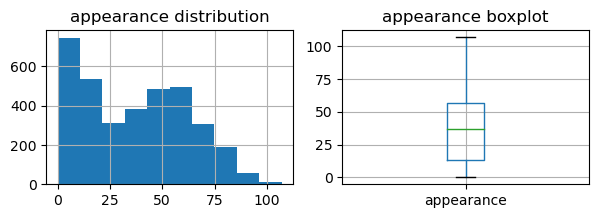

The number of outliers in appearance is 0
count    3521.000000
mean       36.739847
std        25.204503
min         0.000000
25%        13.000000
50%        37.000000
75%        57.000000
max       107.000000
Name: appearance, dtype: float64


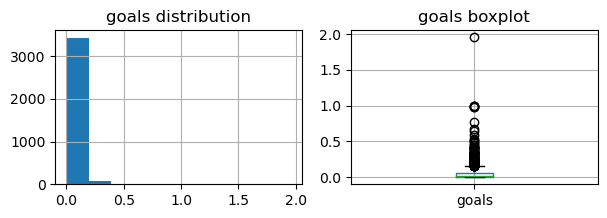

The number of outliers in goals is 131
count    3521.000000
mean        0.043802
std         0.079028
min         0.000000
25%         0.000000
50%         0.022444
75%         0.064103
max         1.956522
Name: goals, dtype: float64


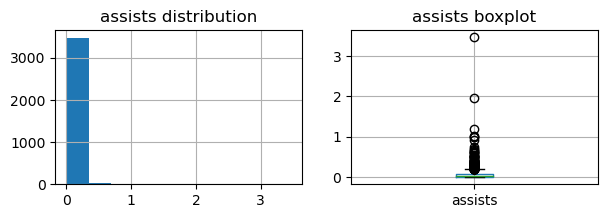

The number of outliers in assists is 195
count    3521.000000
mean        0.055507
std         0.108441
min         0.000000
25%         0.000000
50%         0.023523
75%         0.077620
max         3.461538
Name: assists, dtype: float64


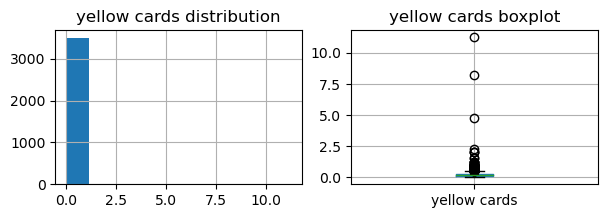

The number of outliers in yellow cards is 120
count    3521.000000
mean        0.199142
std         0.293112
min         0.000000
25%         0.097968
50%         0.175173
75%         0.257143
max        11.250000
Name: yellow cards, dtype: float64


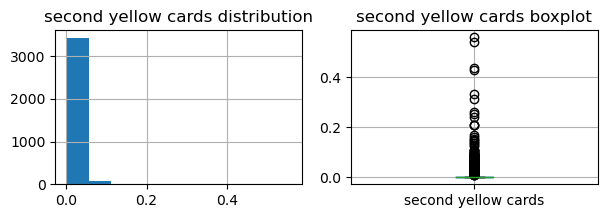

The number of outliers in second yellow cards is 536
count    3521.000000
mean        0.006137
std         0.025566
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.559006
Name: second yellow cards, dtype: float64


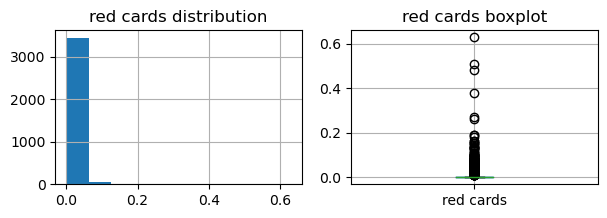

The number of outliers in red cards is 590
count    3521.000000
mean        0.006591
std         0.025035
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.629371
Name: red cards, dtype: float64


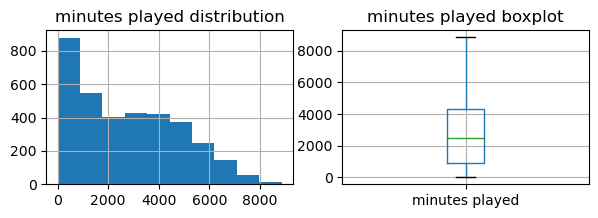

The number of outliers in minutes played is 0
count    3521.000000
mean     2745.850611
std      2059.339313
min         0.000000
25%       886.000000
50%      2515.000000
75%      4336.000000
max      8860.000000
Name: minutes played, dtype: float64


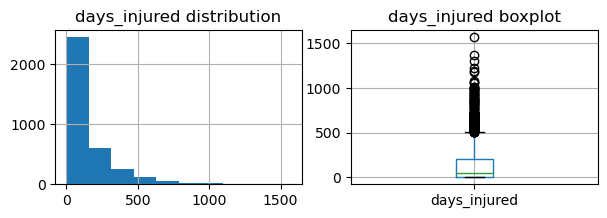

The number of outliers in days_injured is 193
count    3521.000000
mean      130.406987
std       184.883194
min         0.000000
25%         0.000000
50%        52.000000
75%       201.000000
max      1570.000000
Name: days_injured, dtype: float64


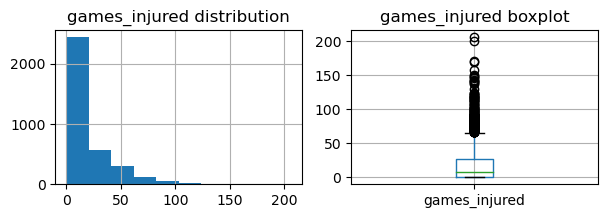

The number of outliers in games_injured is 197
count    3521.000000
mean       17.516899
std        24.714215
min         0.000000
25%         0.000000
50%         7.000000
75%        26.000000
max       206.000000
Name: games_injured, dtype: float64


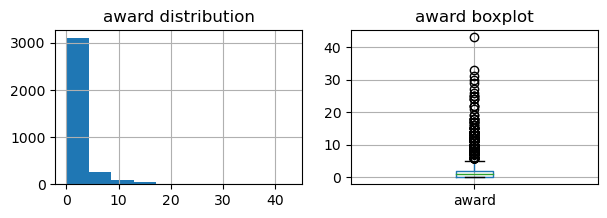

The number of outliers in award is 318
count    3521.000000
mean        1.867651
std         3.275873
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        43.000000
Name: award, dtype: float64


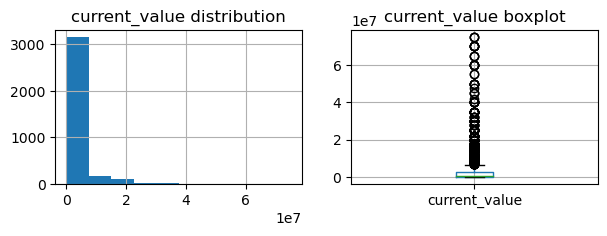

The number of outliers in current_value is 400
count    3.521000e+03
mean     3.302563e+06
std      7.603727e+06
min      0.000000e+00
25%      3.000000e+05
50%      8.000000e+05
75%      2.800000e+06
max      7.500000e+07
Name: current_value, dtype: float64


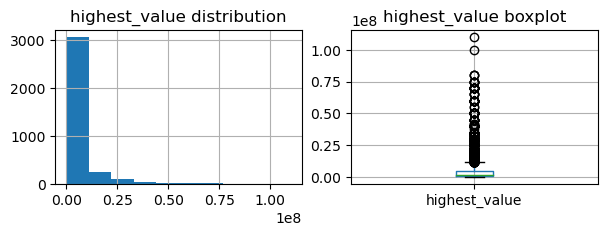

The number of outliers in highest_value is 459
count    3.521000e+03
mean     5.391808e+06
std      1.057046e+07
min      0.000000e+00
25%      5.000000e+05
50%      1.500000e+06
75%      5.000000e+06
max      1.100000e+08
Name: highest_value, dtype: float64


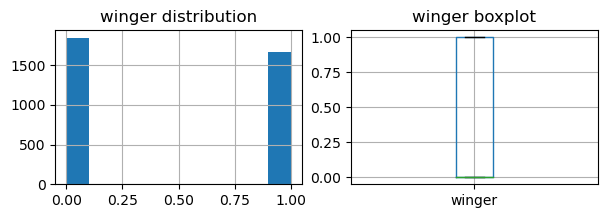

The number of outliers in winger is 0
count    3521.000000
mean        0.475149
std         0.499453
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: winger, dtype: float64
The total number of outliers is 3144


In [128]:
num_cols = df_def.select_dtypes(include=['number']).columns
plot_and_identify_outliers(df_def, num_cols) # Plot and identify outliers

In [129]:
# Filter the df_def dataframe to remove outliers based on multiple conditions
df_def = df_def[
    (df_def['goals'] <= 0.35) &  # Keep rows where 'goals' is less than or equal to 0.35
    (df_def['assists'] <= 0.5) &  # Keep rows where 'assists' is less than or equal to 0.5
    (df_def['yellow cards'] <= 1) &  # Keep rows where 'yellow cards' is less than or equal to 1
    (df_def['second yellow cards'] <= 0.1) &  # Keep rows where 'second yellow cards' is less than or equal to 0.1
    (df_def['red cards'] <= 0.1) &  # Keep rows where 'red cards' is less than or equal to 0.1
    (df_def['days_injured'] <= 600) &  # Keep rows where 'days_injured' is less than or equal to 600
    (df_def['games_injured'] <= 80) &  # Keep rows where 'games_injured' is less than or equal to 80
    (df_def['award'] <= 10) &  # Keep rows where 'award' is less than or equal to 10
    (df_def['highest_value'] <= 0.2e8)  # Keep rows where 'highest_value' is less than or equal to 0.2e8
]

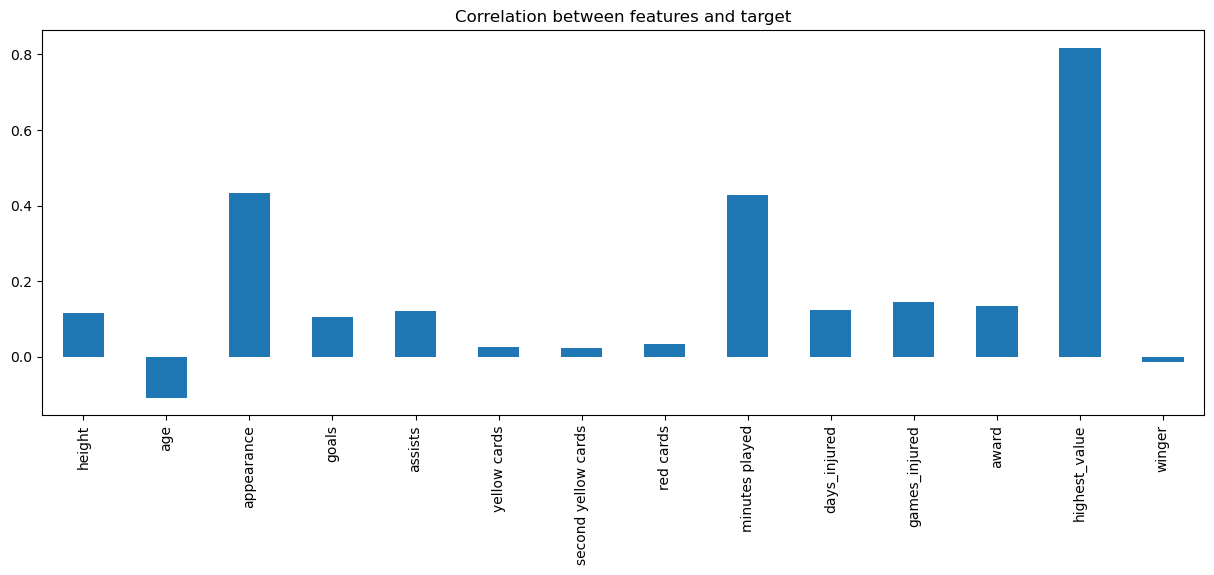

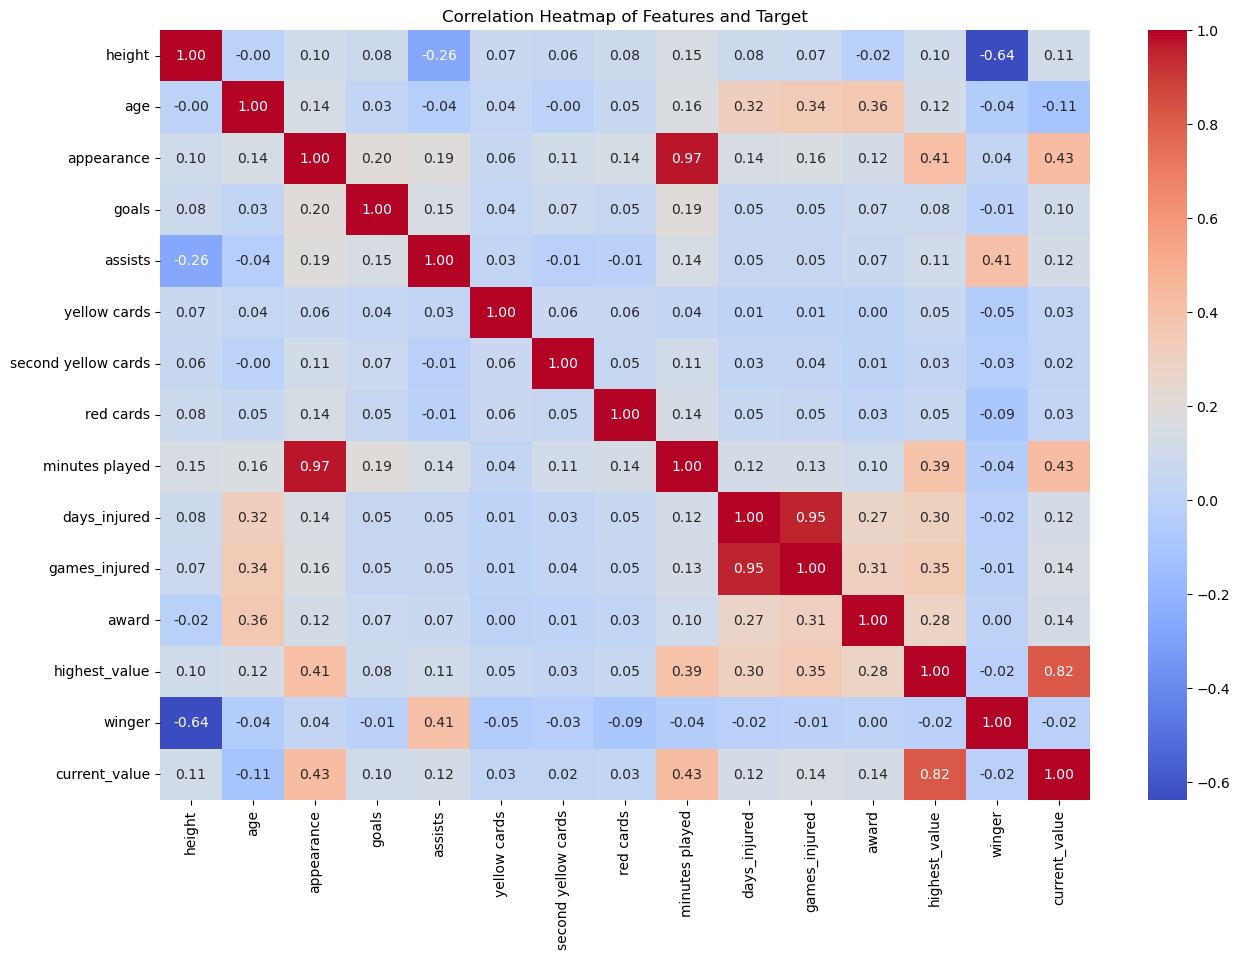

In [130]:
# Split the data into features and target
X_def = df_def.drop(['current_value','team','name'], axis=1)
y_def = df_def['current_value']

num_cols_def = X_def.select_dtypes(include=['number']).columns

# Rescale the numerical columns
scaler = MinMaxScaler()
X_def[num_cols_def] = scaler.fit_transform(X_def[num_cols_def])

# Show the correlation between the features and the target
correlation_def = X_def[num_cols_def].corrwith(y_def)
correlation_def.sort_values(ascending=False)

# Plot the correlation
correlation_def.plot(kind='bar', figsize=(15, 5))
plt.title('Correlation between features and target')
plt.show()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(X_def[num_cols_def].join(y_def).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features and Target')
plt.show()

In [131]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_def, y_def, test_size=0.2, random_state=16)

# Define the target for classification based on current_value
Q1 = df_def['current_value'].quantile(0.25)
Q3 = df_def['current_value'].quantile(0.75)

def classify_value(value):
    if value <= Q1:
        return 'Low'
    elif value <= Q3:
        return 'Mid'
    else:
        return 'High'

df_def['target'] = df_def['current_value'].apply(classify_value)

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_def, df_def['target'], test_size=0.2, random_state=16)

C:\Users\farsa\AppData\Local\Temp\ipykernel_4244\1314510181.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def['target'] = df_def['current_value'].apply(classify_value)


In [132]:
# Create the model
reg_model = LinearRegression()
class_model = LogisticRegression()

# Fit the model
reg_model.fit(X_train, y_train)

# Predict the target
y_pred = reg_model.predict(X_test)

# accuracy of the model
accuracy = reg_model.score(X_test, y_test)
print(f'The accuracy of the model is {accuracy}')
# Fit the classification model
class_model.fit(X_train_class, y_train_class)

# Predict the target for classification
y_pred_class = class_model.predict(X_test_class)

# accuracy of the classification model
accuracy_class = class_model.score(X_test_class, y_test_class)
print(f'The accuracy of the classification model is {accuracy_class}')

The accuracy of the model is 0.7538058935688831
The accuracy of the classification model is 0.7027914614121511


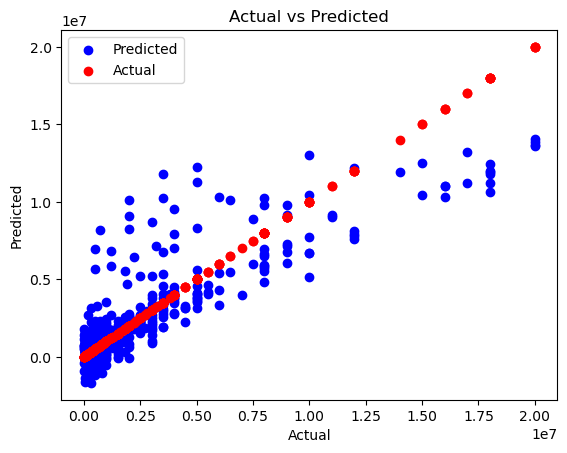

In [133]:
# show the actual and predicted values
df_1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# plot the actual and predicted values in scatter plot
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual')
plt.legend()
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

### Mid dataframe

In [134]:
df_mid.drop(['position', 'clean sheets', 'goals conceded','winger'], axis=1, inplace=True) # Drop the columns that are not needed

C:\Users\farsa\AppData\Local\Temp\ipykernel_4244\3216362797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mid.drop(['position', 'clean sheets', 'goals conceded','winger'], axis=1, inplace=True) # Drop the columns that are not needed


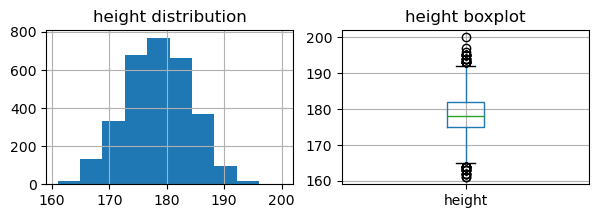

The number of outliers in height is 39
count    3082.000000
mean      178.428894
std         5.861696
min       161.000000
25%       175.000000
50%       178.000000
75%       182.000000
max       200.000000
Name: height, dtype: float64


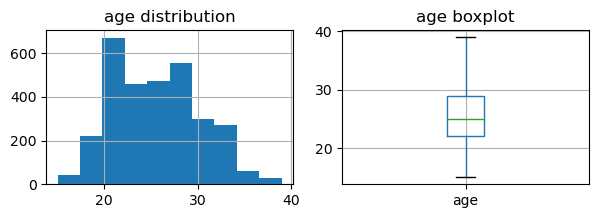

The number of outliers in age is 0
count    3082.000000
mean       25.508207
std         4.611016
min        15.000000
25%        22.000000
50%        25.000000
75%        29.000000
max        39.000000
Name: age, dtype: float64


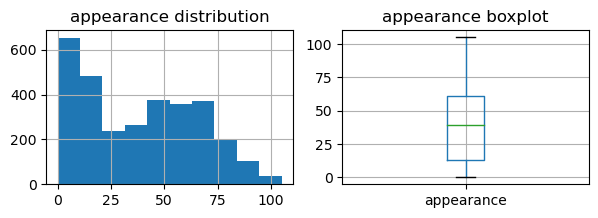

The number of outliers in appearance is 0
count    3082.000000
mean       38.375406
std        27.124825
min         0.000000
25%        13.000000
50%        39.000000
75%        61.000000
max       105.000000
Name: appearance, dtype: float64


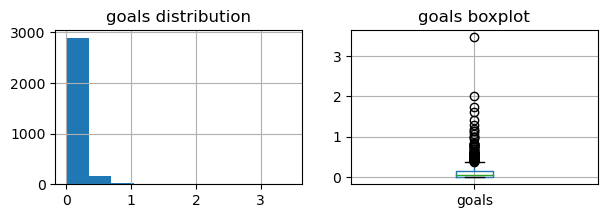

The number of outliers in goals is 135
count    3082.000000
mean        0.110180
std         0.161306
min         0.000000
25%         0.000000
50%         0.067145
75%         0.155715
max         3.461538
Name: goals, dtype: float64


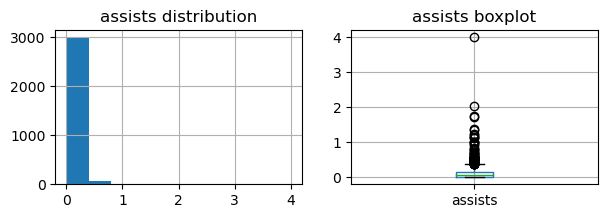

The number of outliers in assists is 107
count    3082.000000
mean        0.103067
std         0.157305
min         0.000000
25%         0.000000
50%         0.066347
75%         0.147252
max         4.000000
Name: assists, dtype: float64


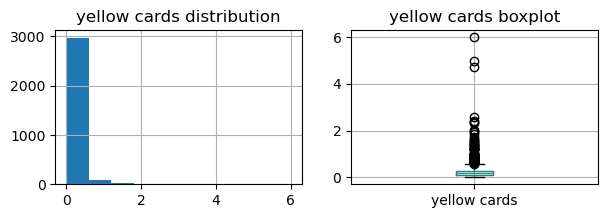

The number of outliers in yellow cards is 113
count    3082.000000
mean        0.219497
std         0.264103
min         0.000000
25%         0.091837
50%         0.184710
75%         0.289910
max         6.000000
Name: yellow cards, dtype: float64


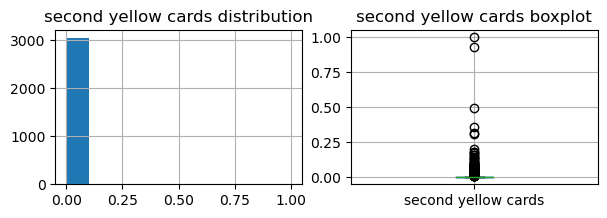

The number of outliers in second yellow cards is 360
count    3082.000000
mean        0.005235
std         0.031775
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: second yellow cards, dtype: float64


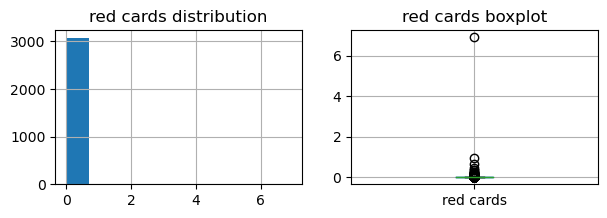

The number of outliers in red cards is 372
count    3082.000000
mean        0.007646
std         0.128113
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.923077
Name: red cards, dtype: float64


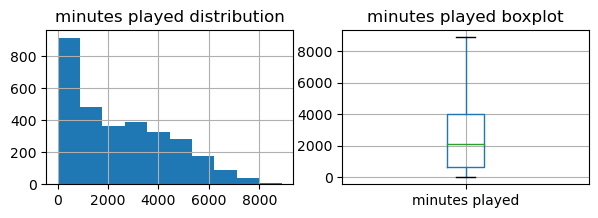

The number of outliers in minutes played is 0
count    3082.000000
mean     2482.272550
std      2012.037165
min         0.000000
25%       676.500000
50%      2121.500000
75%      4007.500000
max      8884.000000
Name: minutes played, dtype: float64


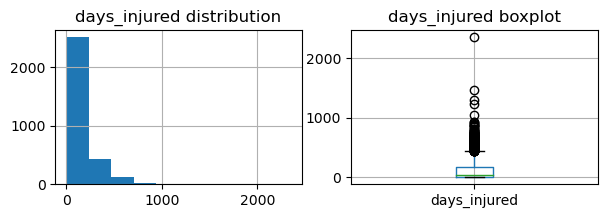

The number of outliers in days_injured is 173
count    3082.000000
mean      113.526282
std       169.616740
min         0.000000
25%         0.000000
50%        35.000000
75%       175.000000
max      2349.000000
Name: days_injured, dtype: float64


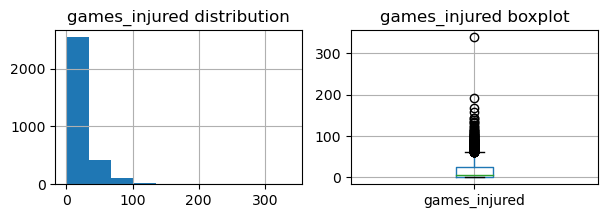

The number of outliers in games_injured is 166
count    3082.000000
mean       15.535367
std        23.289094
min         0.000000
25%         0.000000
50%         5.000000
75%        24.000000
max       339.000000
Name: games_injured, dtype: float64


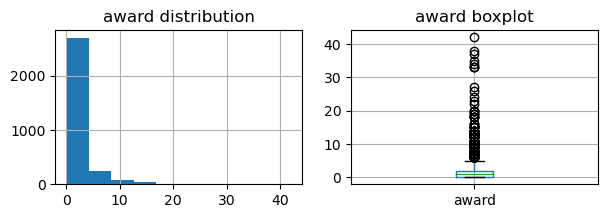

The number of outliers in award is 292
count    3082.000000
mean        1.890006
std         3.429719
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        42.000000
Name: award, dtype: float64


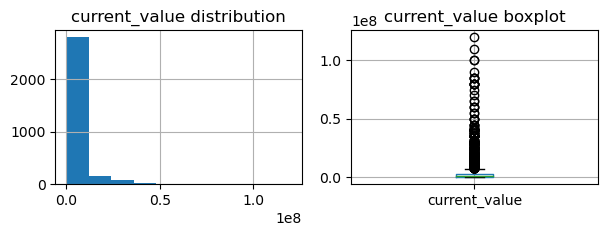

The number of outliers in current_value is 416
count    3.082000e+03
mean     4.049395e+06
std      9.553636e+06
min      0.000000e+00
25%      3.250000e+05
50%      9.000000e+05
75%      3.000000e+06
max      1.200000e+08
Name: current_value, dtype: float64


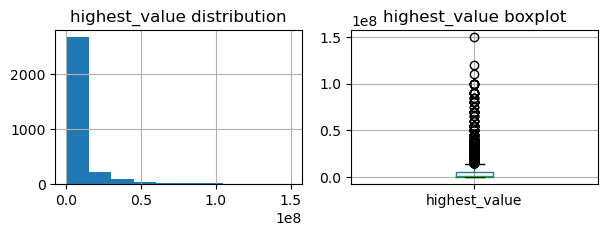

The number of outliers in highest_value is 410
count    3.082000e+03
mean     6.657077e+06
std      1.339853e+07
min      0.000000e+00
25%      5.000000e+05
50%      1.550000e+06
75%      6.000000e+06
max      1.500000e+08
Name: highest_value, dtype: float64


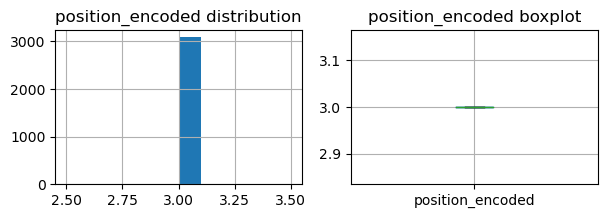

The number of outliers in position_encoded is 0
count    3082.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: position_encoded, dtype: float64
The total number of outliers is 2583


In [135]:
num_cols = df_mid.select_dtypes(include=['number']).columns # Get numerical columns
plot_and_identify_outliers(df_mid, num_cols)

In [136]:
# Filter the df_mid dataframe to remove outliers based on multiple conditions
df_mid = df_mid[
    (df_mid['goals'] <= 0.7) &  # Keep rows where 'goals' is less than or equal to 0.35
    (df_mid['assists'] <= 0.7) &  # Keep rows where 'assists' is less than or equal to 0.5
    (df_mid['yellow cards'] <= 1) &  # Keep rows where 'yellow cards' is less than or equal to 1
    (df_mid['second yellow cards'] <= 0.1) &  # Keep rows where 'second yellow cards' is less than or equal to 0.1
    (df_mid['red cards'] <= 0.5) &  # Keep rows where 'red cards' is less than or equal to 0.1
    (df_mid['days_injured'] <= 500) &  # Keep rows where 'days_injured' is less than or equal to 600
    (df_mid['games_injured'] <= 60) &  # Keep rows where 'games_injured' is less than or equal to 80
    (df_mid['award'] <= 10) &  # Keep rows where 'award' is less than or equal to 10
    (df_mid['highest_value'] <= 0.3e8)  # Keep rows where 'highest_value' is less than or equal to 0.2e8
]

In [137]:
# Split the data into features and target
X_mid = df_mid.drop(['current_value','team','name'], axis=1)
y_mid = df_mid['current_value']

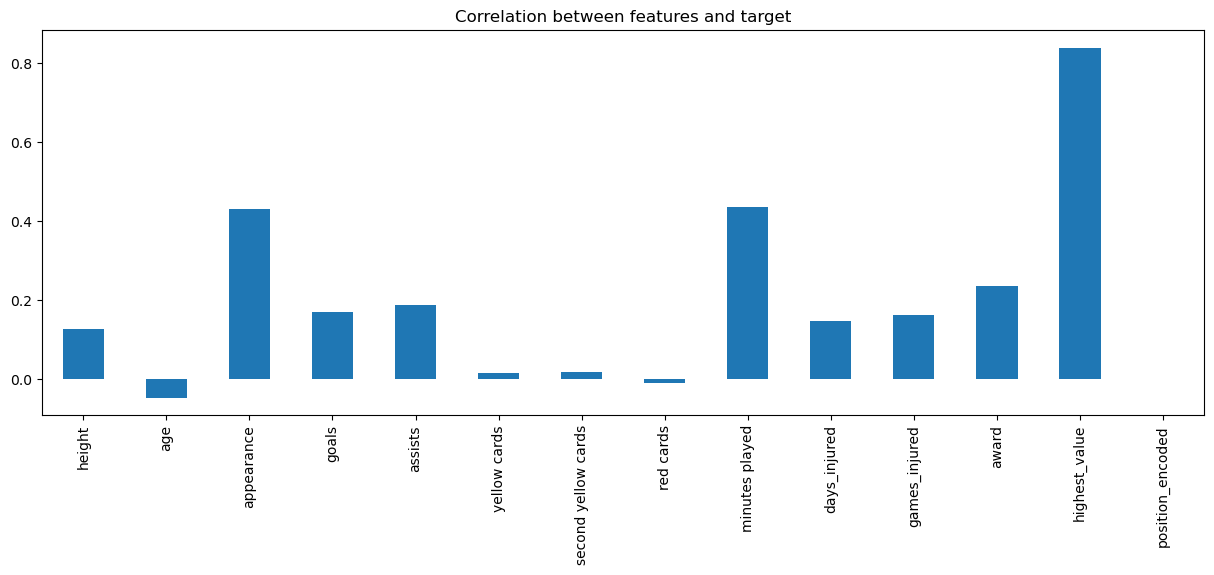

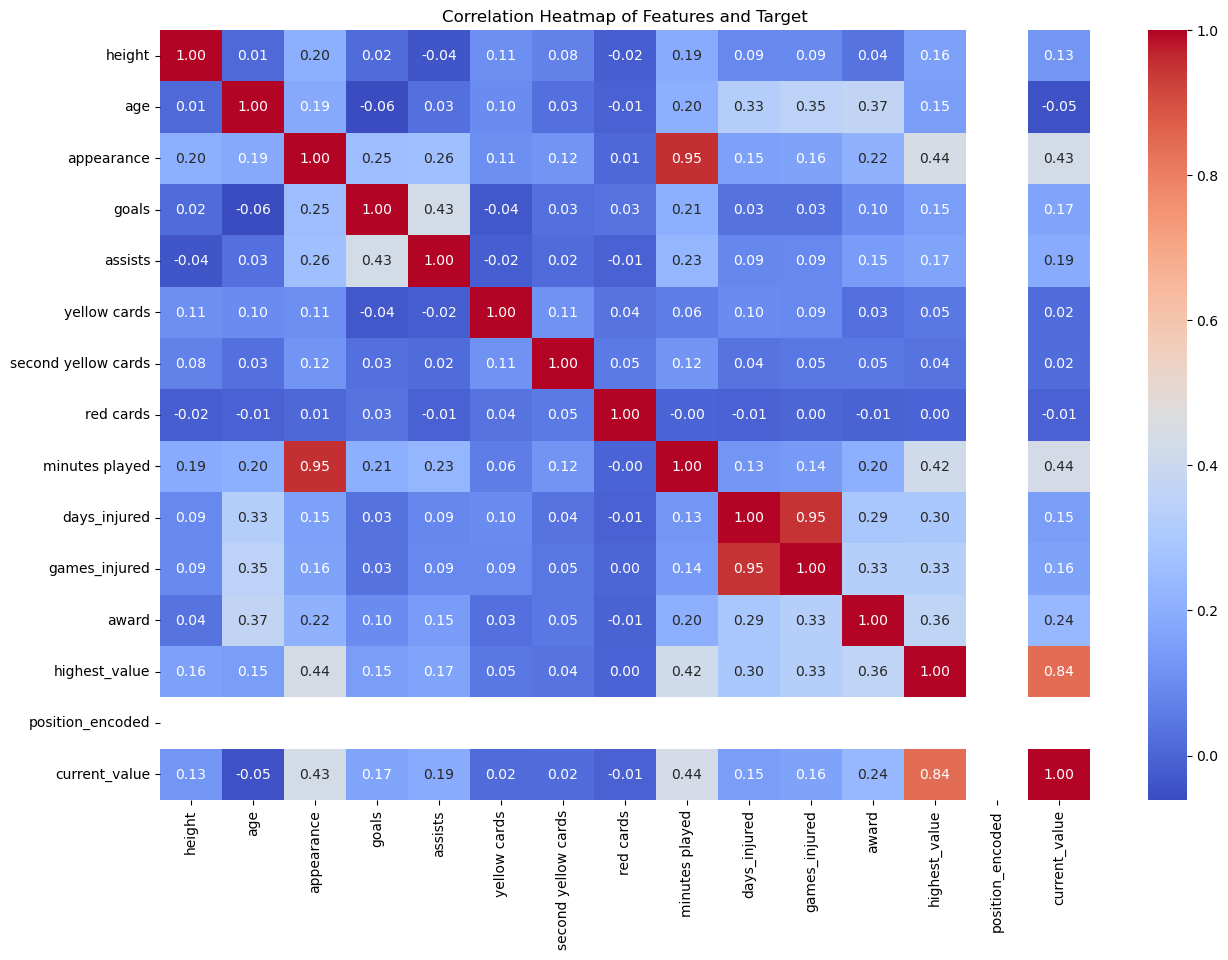

In [138]:
# Rescale the numerical columns
num_cols = X_mid.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
X_mid[num_cols] = scaler.fit_transform(X_mid[num_cols])

# Show the correlation between the features and the target
correlation_mid = X_mid[num_cols].corrwith(y_mid)
correlation_mid.sort_values(ascending=False)

# Plot the correlation
correlation_mid.plot(kind='bar', figsize=(15, 5))
plt.title('Correlation between features and target')
plt.show()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(X_mid[num_cols].join(y_mid).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features and Target')
plt.show()

In [139]:
# Split the data into training and testing sets
X_mid.drop(['appearance','yellow cards','second yellow cards', 'red cards'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X_mid, y_mid, test_size=0.2, random_state=16)

# Define the target for classification based on current_value
Q1 = df_mid['current_value'].quantile(0.25)
Q3 = df_mid['current_value'].quantile(0.75)

def classify_value(value):
    if value <= Q1:
        return 'Low'
    elif value <= Q3:
        return 'Mid'
    else:
        return 'High'

df_mid['target'] = df_mid['current_value'].apply(classify_value)

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_mid, df_mid['target'], test_size=0.2, random_state=16)

In [140]:
# Create the model
reg_model = LinearRegression()
class_model = LogisticRegression()

# Fit the model
reg_model.fit(X_train, y_train)

# Predict the target
y_pred = reg_model.predict(X_test)

# accuracy of the model
accuracy = reg_model.score(X_test, y_test)
print(f'The accuracy of the model is {accuracy}')
# Fit the classification model
class_model.fit(X_train_class, y_train_class)

# Predict the target for classification
y_pred_class = class_model.predict(X_test_class)

# accuracy of the classification model
accuracy_class = class_model.score(X_test_class, y_test_class)
print(f'The accuracy of the classification model is {accuracy_class}')

The accuracy of the model is 0.7418721007736273
The accuracy of the classification model is 0.7215909090909091


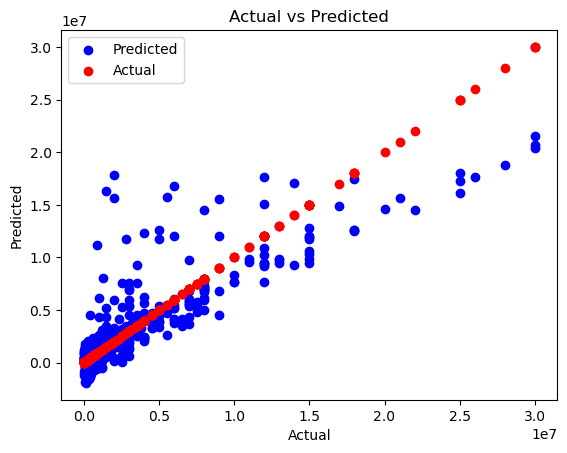

In [141]:
# show the actual and predicted values
df_1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# plot the actual and predicted values in scatter plot
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual')
plt.legend()
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

### Att dataframe

In [142]:
df_att.drop(['position_encoded', 'clean sheets', 'goals conceded','position'], axis=1, inplace=True) 

df_att.describe()

C:\Users\farsa\AppData\Local\Temp\ipykernel_4244\3693439692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_att.drop(['position_encoded', 'clean sheets', 'goals conceded','position'], axis=1, inplace=True)


,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
count,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2.885000e+03,2.885000e+03,2885.000000
mean,179.596329,25.646173,39.131023,0.293311,0.144454,0.206133,0.003805,0.006831,2257.144194,119.107452,15.899827,2.147314,4.355584e+06,7.686321e+06,0.492894
std,6.647941,4.571964,26.744686,0.349656,0.162435,0.710049,0.020356,0.072575,1835.400055,176.189595,23.120321,4.513441,1.088959e+07,1.710188e+07,0.500036
min,161.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,175.000000,22.000000,13.000000,0.114504,0.000000,0.054778,0.000000,0.000000,631.000000,0.000000,0.000000,0.000000,3.500000e+05,5.000000e+05,0.000000
50%,180.000000,25.000000,39.000000,0.257388,0.122158,0.141066,0.000000,0.000000,1901.000000,36.000000,5.000000,1.000000,1.000000e+06,2.000000e+06,0.000000
75%,184.000000,29.000000,62.000000,0.409938,0.209546,0.232558,0.000000,0.000000,3598.000000,184.000000,25.000000,3.000000,3.500000e+06,7.000000e+06,1.000000
max,200.000000,39.000000,107.000000,11.250000,2.903226,30.000000,0.520231,2.500000,8552.000000,1555.000000,171.000000,92.000000,1.800000e+08,2.000000e+08,1.000000


C:\Users\farsa\AppData\Local\Temp\ipykernel_4244\4203120738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_att.drop(['second yellow cards', 'red cards', 'yellow cards'], axis=1, inplace=True) # Drop the columns that are not needed


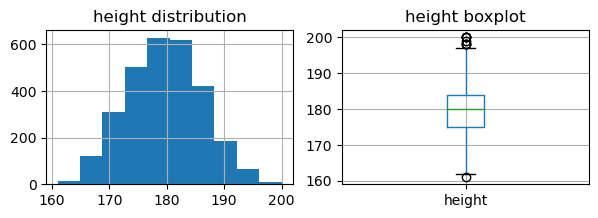

The number of outliers in height is 9
count    2885.000000
mean      179.596329
std         6.647941
min       161.000000
25%       175.000000
50%       180.000000
75%       184.000000
max       200.000000
Name: height, dtype: float64


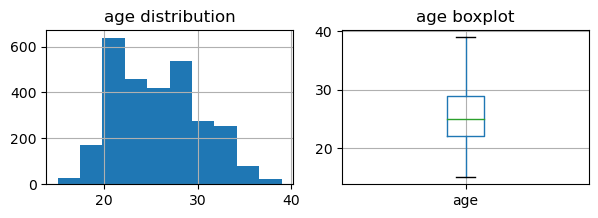

The number of outliers in age is 0
count    2885.000000
mean       25.646173
std         4.571964
min        15.000000
25%        22.000000
50%        25.000000
75%        29.000000
max        39.000000
Name: age, dtype: float64


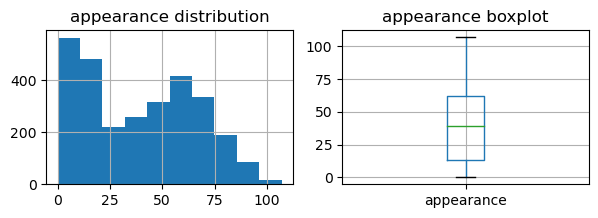

The number of outliers in appearance is 0
count    2885.000000
mean       39.131023
std        26.744686
min         0.000000
25%        13.000000
50%        39.000000
75%        62.000000
max       107.000000
Name: appearance, dtype: float64


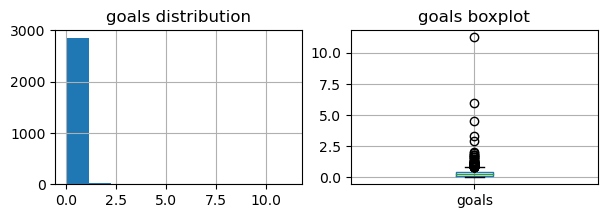

The number of outliers in goals is 76
count    2885.000000
mean        0.293311
std         0.349656
min         0.000000
25%         0.114504
50%         0.257388
75%         0.409938
max        11.250000
Name: goals, dtype: float64


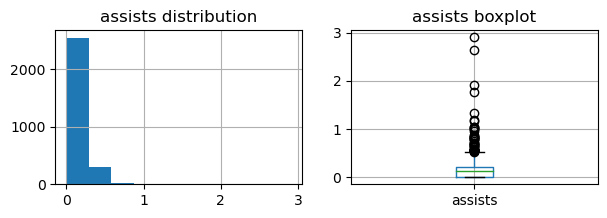

The number of outliers in assists is 48
count    2885.000000
mean        0.144454
std         0.162435
min         0.000000
25%         0.000000
50%         0.122158
75%         0.209546
max         2.903226
Name: assists, dtype: float64


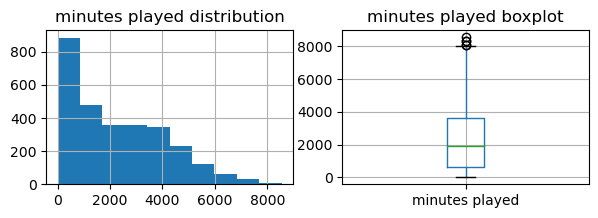

The number of outliers in minutes played is 5
count    2885.000000
mean     2257.144194
std      1835.400055
min         0.000000
25%       631.000000
50%      1901.000000
75%      3598.000000
max      8552.000000
Name: minutes played, dtype: float64


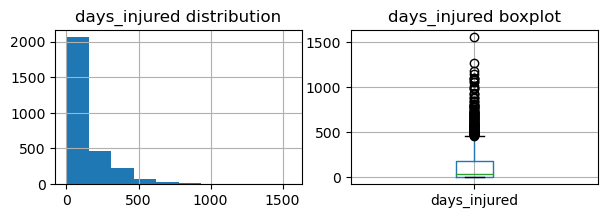

The number of outliers in days_injured is 146
count    2885.000000
mean      119.107452
std       176.189595
min         0.000000
25%         0.000000
50%        36.000000
75%       184.000000
max      1555.000000
Name: days_injured, dtype: float64


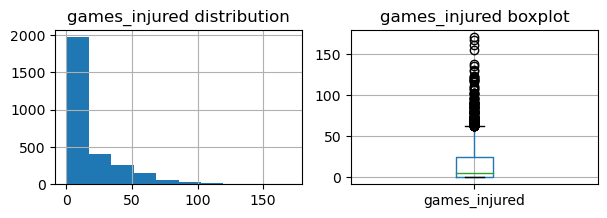

The number of outliers in games_injured is 149
count    2885.000000
mean       15.899827
std        23.120321
min         0.000000
25%         0.000000
50%         5.000000
75%        25.000000
max       171.000000
Name: games_injured, dtype: float64


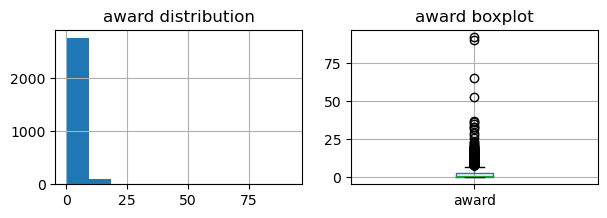

The number of outliers in award is 182
count    2885.000000
mean        2.147314
std         4.513441
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        92.000000
Name: award, dtype: float64


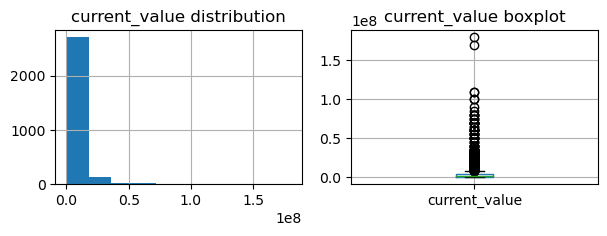

The number of outliers in current_value is 363
count    2.885000e+03
mean     4.355584e+06
std      1.088959e+07
min      0.000000e+00
25%      3.500000e+05
50%      1.000000e+06
75%      3.500000e+06
max      1.800000e+08
Name: current_value, dtype: float64


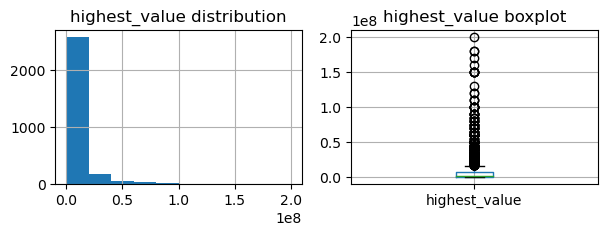

The number of outliers in highest_value is 354
count    2.885000e+03
mean     7.686321e+06
std      1.710188e+07
min      0.000000e+00
25%      5.000000e+05
50%      2.000000e+06
75%      7.000000e+06
max      2.000000e+08
Name: highest_value, dtype: float64


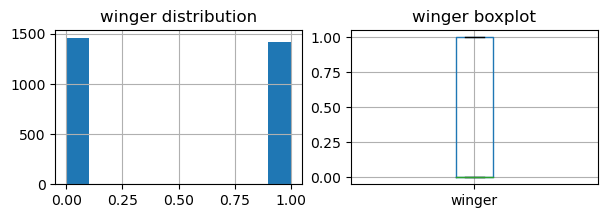

The number of outliers in winger is 0
count    2885.000000
mean        0.492894
std         0.500036
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: winger, dtype: float64
The total number of outliers is 1332


In [143]:
df_att.drop(['second yellow cards', 'red cards', 'yellow cards'], axis=1, inplace=True) # Drop the columns that are not needed

# Get numerical columns
num_cols = df_att.select_dtypes(include=['number']).columns

plot_and_identify_outliers(df_att, num_cols) 

In [144]:
# Filter the df_att dataframe to remove outliers based on multiple conditions
df_att = df_att[
    (df_att['goals'] <= 1) &  # Keep rows where 'goals' is less than or equal to 0.35
    (df_att['assists'] <= 0.5) &  # Keep rows where 'assists' is less than or equal to 0.5
    (df_att['days_injured'] <= 500) &  # Keep rows where 'days_injured' is less than or equal to 600
    (df_att['games_injured'] <= 70) &  # Keep rows where 'games_injured' is less than or equal to 80
    (df_att['award'] <= 17) &  # Keep rows where 'award' is less than or equal to 17
    (df_att['highest_value'] <= 0.4e8)  # Keep rows where 'highest_value' is less than or equal to 0.4e8
]

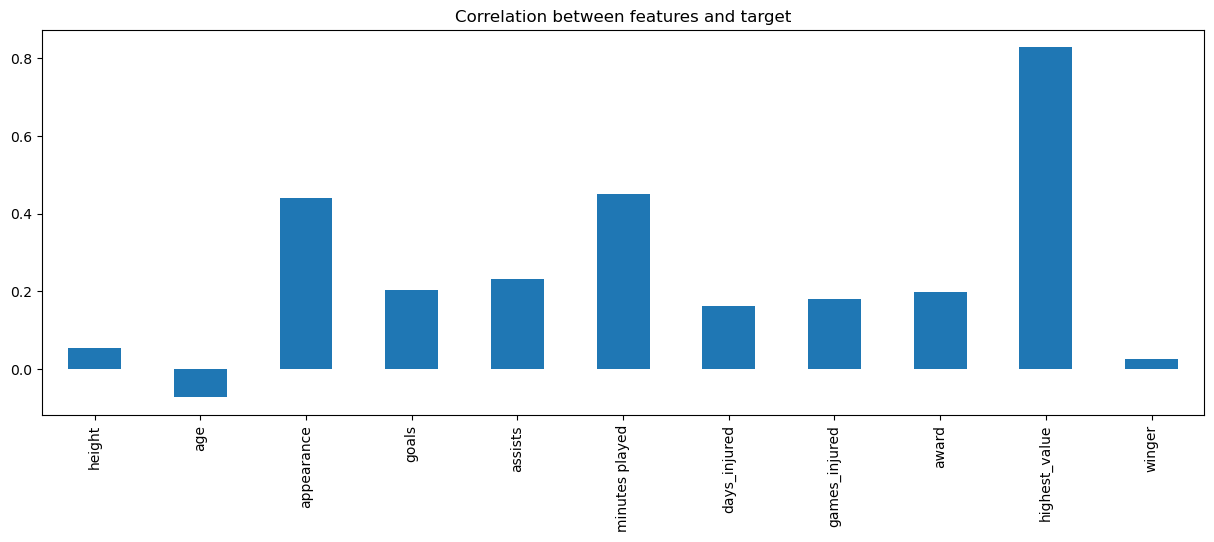

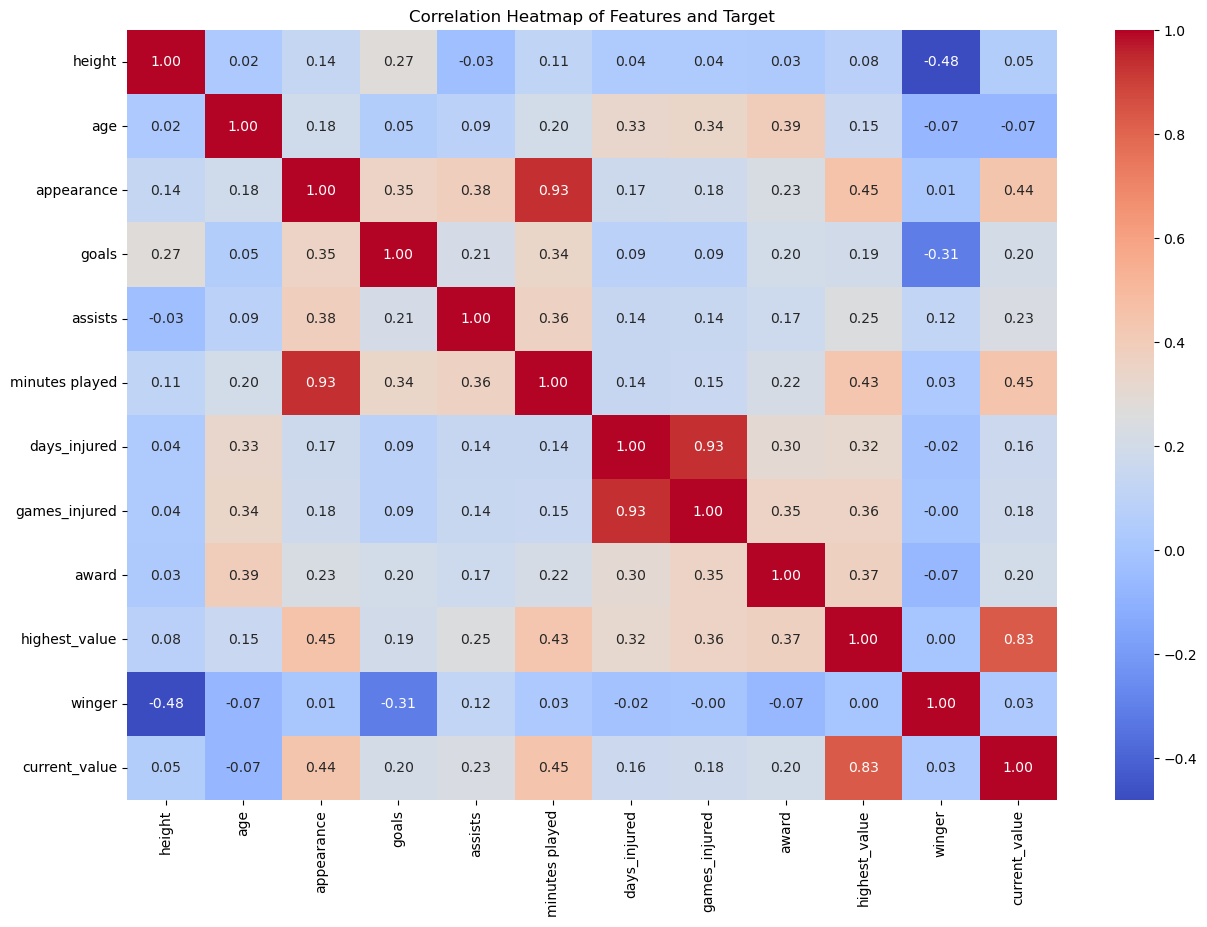

In [145]:
# Split the data into features and target
X_att = df_att.drop(['current_value','team','name'], axis=1)
y_att = df_att['current_value']

# Update num_cols to exclude 'current_value'
num_cols = num_cols.drop('current_value', errors='ignore')

# Rescale the numerical columns
scaler = MinMaxScaler()
X_att[num_cols] = scaler.fit_transform(X_att[num_cols])

# Show the correlation between the features and the target
correlation_att = X_att[num_cols].corrwith(y_att)
correlation_att.sort_values(ascending=False)

# Plot the correlation
correlation_att.plot(kind='bar', figsize=(15, 5))
plt.title('Correlation between features and target')
plt.show()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(X_att[num_cols].join(y_att).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features and Target')
plt.show()

In [146]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_att, y_att, test_size=0.2, random_state=16)

# Define the target for classification based on current_value
Q1 = df_def['current_value'].quantile(0.25)
Q3 = df_def['current_value'].quantile(0.75)

def classify_value(value):
    if value <= Q1:
        return 'Low'
    elif value <= Q3:
        return 'Mid'
    else:
        return 'High'

df_att['target'] = df_att['current_value'].apply(classify_value)

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_att, df_att['target'], test_size=0.2, random_state=16)

In [147]:
# Create the model
reg_model = LinearRegression()
class_model = LogisticRegression()

# Fit the model
reg_model.fit(X_train, y_train)

# Predict the target
y_pred = reg_model.predict(X_test)

# accuracy of the model
accuracy = reg_model.score(X_test, y_test)
print(f'The accuracy of the model is {accuracy}')
# Fit the classification model
class_model.fit(X_train_class, y_train_class)

# Predict the target for classification
y_pred_class = class_model.predict(X_test_class)

# accuracy of the classification model
accuracy_class = class_model.score(X_test_class, y_test_class)
print(f'The accuracy of the classification model is {accuracy_class}')

The accuracy of the model is 0.7382487916495923
The accuracy of the classification model is 0.723196881091618


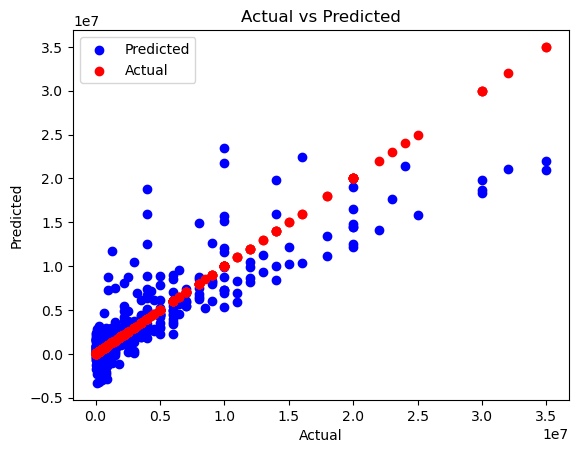

In [148]:
# show the actual and predicted values
df_1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# plot the actual and predicted values in scatter plot
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual')
plt.legend()
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

**Nonlinear Patterns:** Linear regression assumes a linear relationship, but the spread of points at higher values shows that the model isn’t capturing some of the underlying patterns accurately. This often implies that the data might have a nonlinear component that Linear Regression is unable to model.

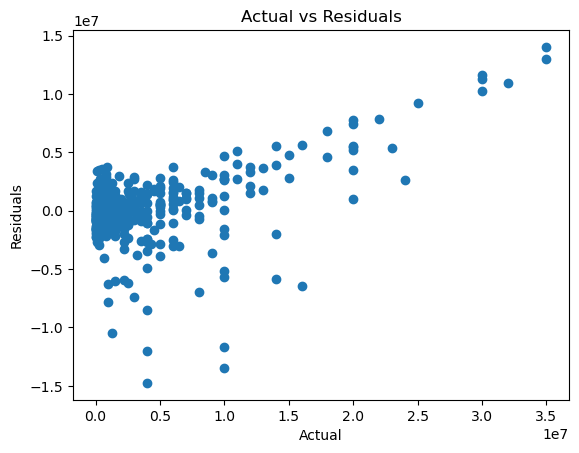

In [149]:
# residuals
residuals = y_test - y_pred

# plot the residuals
plt.scatter(y_test, residuals)
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Actual vs Residuals')
plt.show()

The residual plot suggests that the relationship may not be linear, and a linear model might not be the best fit for this data

## Conclusion

In this notebook, we explored the dataset containing information about football players from various leagues. We performed data cleaning, handled outliers, and built predictive models for different player positions (Goalkeepers, Defenders, Midfielders, and Attackers) using Linear Regression. 

### Key Steps:
1. **Data Cleaning**: We removed unnecessary columns and handled missing values.
2. **Outlier Detection and Removal**: We identified and removed outliers to improve model performance.
3. **Feature Scaling**: We scaled numerical features using MinMaxScaler.
4. **Model Building**: We built separate Linear Regression models and LogisticRegression for each player position.
5. **Model Evaluation**: We evaluated the models using accuracy scores and visualized the actual vs. predicted values.

### Observations:
- The models showed varying degrees of accuracy, with some positions having better predictive power than others.
- The residual plots suggested that the relationship between features and the target variable might not be purely linear, indicating the potential for improvement using more complex models.

Overall, this analysis provides a solid foundation for predicting football players' transfer values, but there is room for further refinement and improvement.

**NOTE: Data Profiling is done throughout the process**